# Stacked Bar Charts

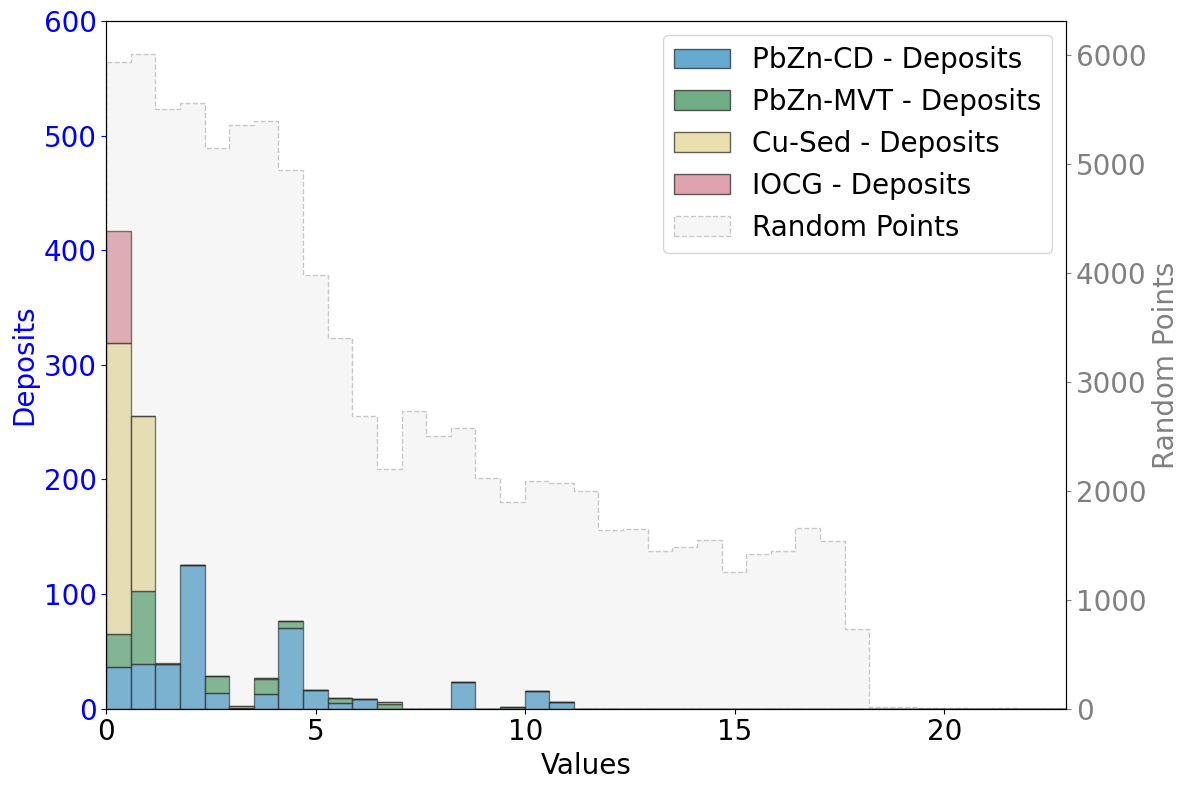

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your CSV file into a DataFrame
file_path = 'deposits_VS_random.csv'  # Update with your file path
df = pd.read_csv(file_path, low_memory=False)

# Define colors based on deposit type
type_colors = {
    'PbZn-CD': '#0072B2',  # Blue
    'PbZn-MVT': '#117733',  # Green
    'Cu-Sed': '#DDCC77',  # Yellow
    'IOCG': '#CC6677'  # Pink
}

# Keep only `D_cr_ve` and `R_cr_ve`
deposit_column = 'D_cr_ve'
random_column = 'R_cr_ve'

# Function to plot stacked bar charts for deposits and separate random histograms
def plot_stacked_bar_chart_with_random(df, deposit_column, random_column, weights_column, type_colors):
    # Filter out types with no valid deposit data for the legend
    valid_types = df[~df[deposit_column].isna()]['Type'].unique()
    
    fig, ax1 = plt.subplots(figsize=(12, 8))
    ax2 = ax1.twinx()  # Create a second y-axis for the random data

    # Define consistent bin edges (using min/max of both data sets)
    min_val = 0  # Start from 0 for both deposit and random data
    max_val = max(df[deposit_column].max(), df[random_column].max())
    bin_edges = np.linspace(min_val, max_val, 40)  # 40 bins for consistency
    bin_width = bin_edges[1] - bin_edges[0]

    # Initialize an array to store the bottom position for stacking
    bottom = np.zeros(len(bin_edges) - 1)

    # Plot stacked bars for each deposit type
    for deposit_type in valid_types:
        type_data = df[df['Type'] == deposit_type]
        deposit_data = type_data[deposit_column].dropna()
        deposit_weights = type_data[weights_column]

        counts, _ = np.histogram(deposit_data, bins=bin_edges, weights=deposit_weights[:len(deposit_data)])
        ax1.bar(
            bin_edges[:-1] + (bin_width / 2),  # Shift bars to start from 0 properly
            counts,
            width=bin_width,
            color=type_colors.get(deposit_type, 'gray'),
            alpha=0.6,
            label=f'{deposit_type} - Deposits',
            edgecolor='black',
            bottom=bottom
        )
        # Update the bottom position for the next stack
        bottom += counts

    # Plot histogram for random data on the right y-axis
    random_data = df[random_column].dropna()  # Consider all rows in the random column
    random_weights = df[weights_column].dropna()

    ax2.hist(
        random_data,
        bins=bin_edges,  # Matching bin size to make comparison meaningful
        color='lightgray',
        alpha=0.2,
        label='Random Points',
        edgecolor='black',  # Thin border for each bar
        linestyle='dashed',
        histtype='stepfilled',
        density=False  # Absolute frequency
    )

    # Customize font sizes (doubling them) and colors
    font_size = 20  # Adjusted from default ~10

    ax1.set_xlabel('Values', fontsize=font_size, color='black')  # X-axis in black
    ax1.set_ylabel('Deposits', fontsize=font_size, color='blue')  # Deposits in blue
    ax2.set_ylabel('Random Points', fontsize=font_size, color='gray')  # Random in gray

    ax1.tick_params(axis='x', labelsize=font_size, colors='black')  # X-axis in black
    ax1.tick_params(axis='y', labelsize=font_size, colors='blue')  # Deposits (left y-axis) in blue
    ax2.tick_params(axis='y', labelsize=font_size, colors='gray')  # Random (right y-axis) in gray

    ax1.set_ylim([0, 600])  # Adjust as needed
    ax1.set_xlim([0, max_val])  # Adjust to fit the data range

    # Combine legends from both axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=font_size)

    plt.tight_layout()
    plt.show()

# Plot for `D_cr_ve` and `R_cr_ve`
plot_stacked_bar_chart_with_random(
    df,
    deposit_column=deposit_column,
    random_column=random_column,
    weights_column='TM2',
    type_colors=type_colors
)


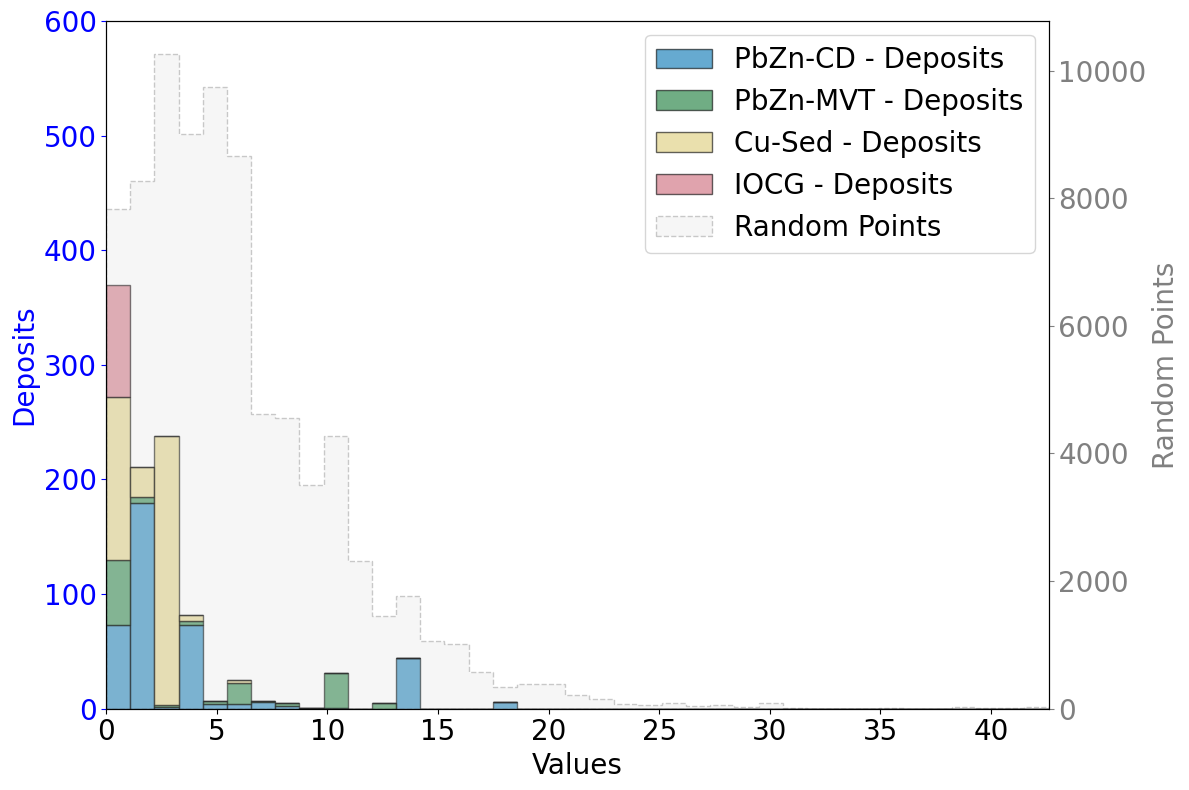

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your CSV file into a DataFrame
file_path = 'deposits_VS_random.csv'  # Update with your file path
df = pd.read_csv(file_path, low_memory=False)

# Define colors based on deposit type
type_colors = {
    'PbZn-CD': '#0072B2',  # Blue
    'PbZn-MVT': '#117733',  # Green
    'Cu-Sed': '#DDCC77',  # Yellow
    'IOCG': '#CC6677'  # Pink
}

# Replace NaN values in 'Type' with 'Unknown'
df['Type'] = df['Type'].fillna('Unknown')

# Keep only `D_sb_ve` and `R_sb_ve`
deposit_column = 'D_sb_ve'
random_column = 'R_sb_ve'

# Function to plot stacked bar charts for deposits and separate random histograms
def plot_stacked_bar_chart_with_random(df, deposit_column, random_column, weights_column, type_colors):
    unique_types = df['Type'].unique()
    fig, ax1 = plt.subplots(figsize=(12, 8))
    ax2 = ax1.twinx()  # Create a second y-axis for the random data

    # Define consistent bin edges (using min/max of both data sets)
    min_val = 0  # Start from 0 for both deposit and random data
    max_val = max(df[deposit_column].max(), df[random_column].max())
    bin_edges = np.linspace(min_val, max_val, 40)  # 40 bins for consistency
    bin_width = bin_edges[1] - bin_edges[0]

    # Initialize an array to store the bottom position for stacking
    bottom = np.zeros(len(bin_edges) - 1)

    # Plot stacked bars for each deposit type
    for deposit_type in unique_types:
        if deposit_type == 'Unknown':
            continue  # Skip the 'Unknown' type
        type_data = df[df['Type'] == deposit_type]
        deposit_data = type_data[deposit_column].dropna()
        deposit_weights = type_data[weights_column]

        counts, _ = np.histogram(deposit_data, bins=bin_edges, weights=deposit_weights[:len(deposit_data)])
        ax1.bar(
            bin_edges[:-1] + (bin_width / 2),  # Shift bars to start from 0 properly
            counts,
            width=bin_width,
            color=type_colors.get(deposit_type, 'gray'),
            alpha=0.6,
            label=f'{deposit_type} - Deposits',
            edgecolor='black',
            bottom=bottom
        )
        # Update the bottom position for the next stack
        bottom += counts

    # Plot histogram for random data on the right y-axis
    random_data = df[random_column].dropna()  # Consider all rows in the random column
    random_weights = df[weights_column].dropna()

    ax2.hist(
        random_data,
        bins=bin_edges,  # Matching bin size to make comparison meaningful
        color='lightgray',
        alpha=0.2,
        label='Random Points',
        edgecolor='black',  # Thin border for each bar
        linestyle='dashed',
        histtype='stepfilled',
        density=False  # Absolute frequency
    )

    # Customize font sizes (doubling them) and colors
    font_size = 20  # Adjusted from default ~10

    ax1.set_xlabel('Values', fontsize=font_size, color='black')  # X-axis in black
    ax1.set_ylabel('Deposits', fontsize=font_size, color='blue')  # Deposits in blue
    ax2.set_ylabel('Random Points', fontsize=font_size, color='gray')  # Random in gray

    ax1.tick_params(axis='x', labelsize=font_size, colors='black')  # X-axis in black
    ax1.tick_params(axis='y', labelsize=font_size, colors='blue')  # Deposits (left y-axis) in blue
    ax2.tick_params(axis='y', labelsize=font_size, colors='gray')  # Random (right y-axis) in gray

    ax1.set_ylim([0, 600])  # Adjust as needed
    ax1.set_xlim([0, max_val])  # Adjust to fit the data range

    # Combine legends from both axes, excluding 'Unknown'
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    filtered_legend = [(line, label) for line, label in zip(lines1 + lines2, labels1 + labels2) if 'Unknown' not in label]
    filtered_lines, filtered_labels = zip(*filtered_legend) if filtered_legend else ([], [])
    ax1.legend(filtered_lines, filtered_labels, loc='upper right', fontsize=font_size)

    plt.tight_layout()
    plt.show()

# Plot for `D_sb_ve` and `R_sb_ve`
plot_stacked_bar_chart_with_random(
    df,
    deposit_column=deposit_column,
    random_column=random_column,
    weights_column='TM2',
    type_colors=type_colors
)


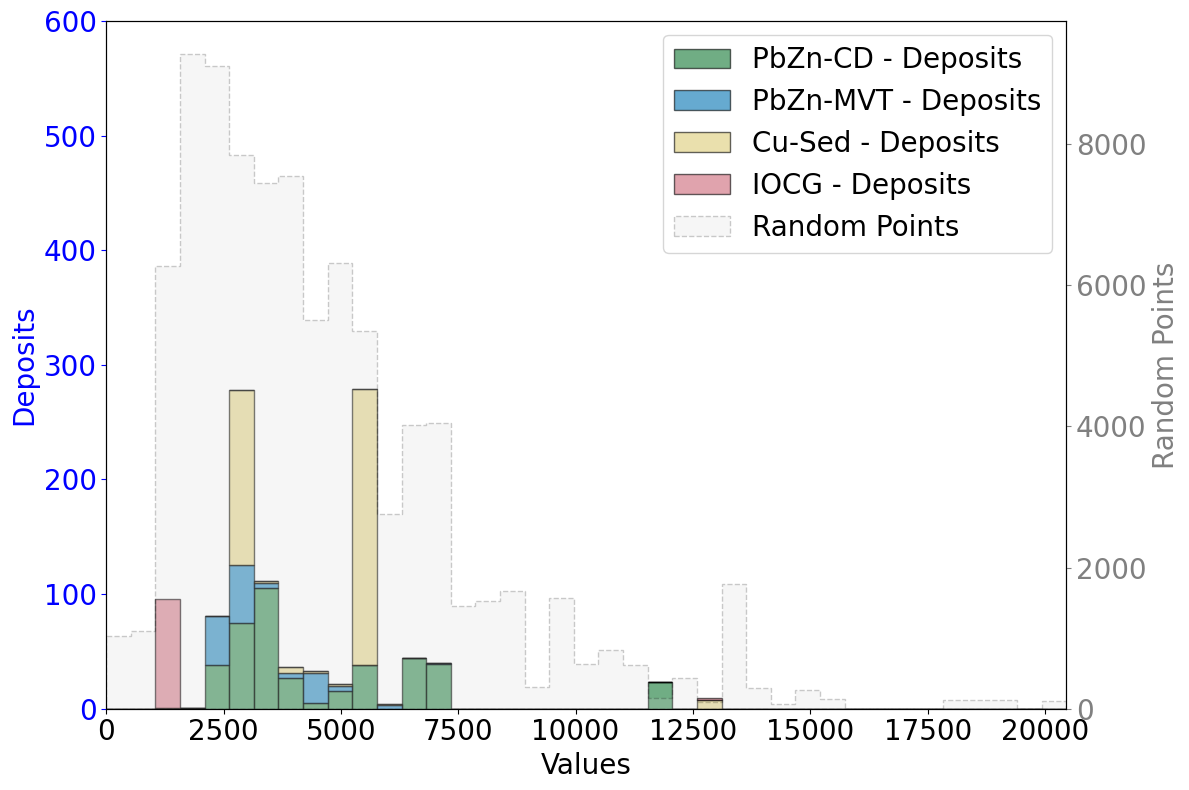

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your CSV file into a DataFrame
file_path = 'deposits_VS_random.csv'  # Update with your file path
df = pd.read_csv(file_path, low_memory=False)

# Define updated colors based on deposit type
type_colors = {
    'PbZn-CD': '#117733',  # Green
    'PbZn-MVT': '#0072B2',  # Blue
    'Cu-Sed': '#DDCC77',  # Yellow
    'IOCG': '#CC6677',  # Pink
    'Unknown': 'gray'  # For any NaN or unknown types
}

# Replace NaN values in 'Type' with 'Unknown'
df['Type'] = df['Type'].fillna('Unknown')

# Function to plot stacked bar charts for deposits and separate random histograms
def plot_stacked_bar_chart_with_random(df, deposit_column, random_column, weights_column, type_colors):
    unique_types = df['Type'].unique()
    fig, ax1 = plt.subplots(figsize=(12, 8))
    ax2 = ax1.twinx()  # Create a second y-axis for the random data

    # Define consistent bin edges (using min/max of both data sets)
    min_val = 0  # Start from 0 for both deposit and random data
    max_val = max(df[deposit_column].max(), df[random_column].max())
    bin_edges = np.linspace(min_val, max_val, 40)  # 40 bins for consistency
    bin_width = bin_edges[1] - bin_edges[0]

    # Initialize an array to store the bottom position for stacking
    bottom = np.zeros(len(bin_edges) - 1)

    # Plot stacked bars for each deposit type
    for deposit_type in unique_types:
        if deposit_type == 'Unknown':  # Skip the 'Unknown' type
            continue
        type_data = df[df['Type'] == deposit_type]
        deposit_data = type_data[deposit_column].dropna()
        deposit_weights = type_data[weights_column]

        counts, _ = np.histogram(deposit_data, bins=bin_edges, weights=deposit_weights[:len(deposit_data)])
        ax1.bar(
            bin_edges[:-1] + (bin_width / 2),  # Shift bars to start from 0 properly
            counts,
            width=bin_width,
            color=type_colors.get(deposit_type, 'gray'),
            alpha=0.6,
            label=f'{deposit_type} - Deposits',
            edgecolor='black',
            bottom=bottom
        )
        # Update the bottom position for the next stack
        bottom += counts

    # Plot histogram for random data on the right y-axis
    random_data = df[random_column].dropna()  # Consider all rows in the random column
    random_weights = df[weights_column].dropna()

    ax2.hist(
        random_data,
        bins=bin_edges,  # Matching bin size to make comparison meaningful
        color='lightgray',
        alpha=0.2,
        label='Random Points',
        edgecolor='black',  # Thin border for each bar
        linestyle='dashed',
        histtype='stepfilled',
        density=False  # Absolute frequency
    )

    # Customize font sizes (doubling them) and colors
    font_size = 20  # Adjusted from default ~10

    ax1.set_xlabel('Values', fontsize=font_size, color='black')  # X-axis in black
    ax1.set_ylabel('Deposits', fontsize=font_size, color='blue')  # Deposits in blue
    ax2.set_ylabel('Random Points', fontsize=font_size, color='gray')  # Random in gray

    ax1.tick_params(axis='x', labelsize=font_size, colors='black')  # X-axis in black
    ax1.tick_params(axis='y', labelsize=font_size, colors='blue')  # Deposits (left y-axis) in blue
    ax2.tick_params(axis='y', labelsize=font_size, colors='gray')  # Random (right y-axis) in gray

    ax1.set_ylim([0, 600])  # Adjust as needed
    ax1.set_xlim([0, max_val])  # Adjust to fit the data range

    # Combine legends from both axes, excluding 'Unknown'
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    filtered_legend = [(line, label) for line, label in zip(lines1 + lines2, labels1 + labels2) if 'Unknown' not in label]
    filtered_lines, filtered_labels = zip(*filtered_legend) if filtered_legend else ([], [])
    ax1.legend(filtered_lines, filtered_labels, loc='upper right', fontsize=font_size)

    plt.tight_layout()
    plt.show()

# Plotting for "D_sub_len_m" vs "R_sub_len_m"
plot_stacked_bar_chart_with_random(
    df,
    deposit_column='D_sub_len_m',
    random_column='R_sub_len_m',
    weights_column='TM2',
    type_colors=type_colors
)


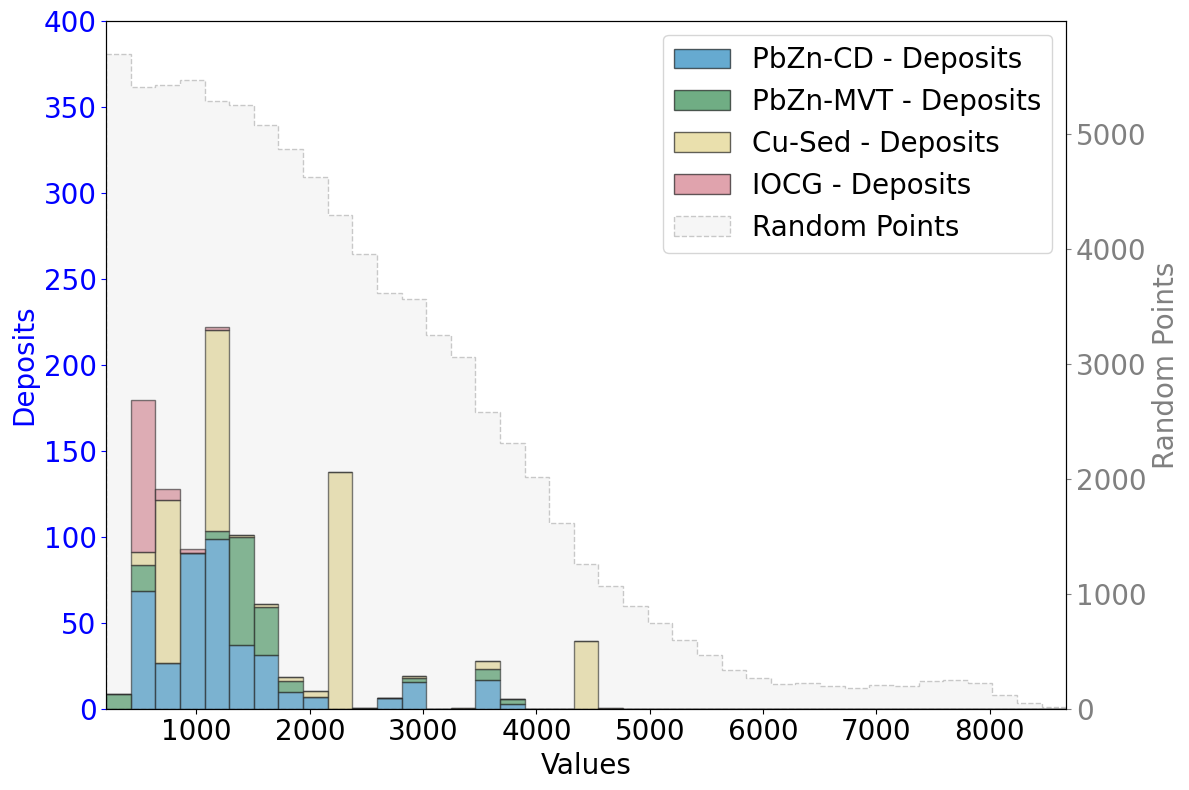

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your CSV file into a DataFrame
file_path = 'deposits_VS_random.csv'  # Update with your file path
df = pd.read_csv(file_path, low_memory=False)

# Define updated colors based on deposit type
type_colors = {
    'PbZn-CD': '#0072B2',  # Blue
    'PbZn-MVT': '#117733',  # Green
    'Cu-Sed': '#DDCC77',  # Yellow
    'IOCG': '#CC6677'  # Pink
}

# Replace NaN values in 'Type' with 'Unknown'
df['Type'] = df['Type'].fillna('Unknown')

# Function to plot stacked bar charts for deposits and separate random histograms
def plot_stacked_bar_chart_with_random(df, deposit_column, random_column, weights_column, type_colors):
    unique_types = df['Type'].unique()
    fig, ax1 = plt.subplots(figsize=(12, 8))
    ax2 = ax1.twinx()  # Create a second y-axis for the random data

    # Define consistent bin edges (using min/max of both data sets)
    min_val = df[deposit_column].min()  # Use minimum value of deposit data
    max_val = max(df[deposit_column].max(), df[random_column].max())
    bin_edges = np.linspace(min_val, max_val, 40)  # 40 bins for consistency
    bin_width = bin_edges[1] - bin_edges[0]

    # Initialize an array to store the bottom position for stacking
    bottom = np.zeros(len(bin_edges) - 1)

    # Plot stacked bars for each deposit type
    for deposit_type in unique_types:
        if deposit_type == 'Unknown':  # Skip the 'Unknown' type
            continue
        type_data = df[df['Type'] == deposit_type]
        deposit_data = type_data[deposit_column].dropna()
        deposit_weights = type_data[weights_column]

        if len(deposit_data) > 0:  # Only plot if there is data for this type
            counts, _ = np.histogram(deposit_data, bins=bin_edges, weights=deposit_weights[:len(deposit_data)])
            ax1.bar(
                bin_edges[:-1] + (bin_width / 2),  # Shift bars to start from 0 properly
                counts,
                width=bin_width,
                color=type_colors.get(deposit_type, 'gray'),
                alpha=0.6,
                label=f'{deposit_type} - Deposits',
                edgecolor='black',
                bottom=bottom
            )
            # Update the bottom position for the next stack
            bottom += counts

    # Plot histogram for random data on the right y-axis
    random_data = df[random_column].dropna()
    random_weights = df[weights_column].dropna()

    ax2.hist(
        random_data,
        bins=bin_edges,  # Matching bin size to make comparison meaningful
        color='lightgray',
        alpha=0.2,
        label='Random Points',
        edgecolor='black',  # Thin border for each bar
        linestyle='dashed',
        histtype='stepfilled',
        density=False  # Absolute frequency
    )

    # Customize font sizes (doubling them) and colors
    font_size = 20  # Adjusted from default ~10

    ax1.set_xlabel('Values', fontsize=font_size, color='black')  # X-axis in black
    ax1.set_ylabel('Deposits', fontsize=font_size, color='blue')  # Deposits in blue
    ax2.set_ylabel('Random Points', fontsize=font_size, color='gray')  # Random in gray

    ax1.tick_params(axis='x', labelsize=font_size, colors='black')  # X-axis in black
    ax1.tick_params(axis='y', labelsize=font_size, colors='blue')  # Deposits (left y-axis) in blue
    ax2.tick_params(axis='y', labelsize=font_size, colors='gray')  # Random (right y-axis) in gray

    ax1.set_ylim([0, 400])  # Adjust dynamically as needed
    ax1.set_xlim([min_val, max_val])  # Adjust to cover full range of data

    # Combine legends from both axes, excluding 'Unknown'
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    filtered_legend = [(line, label) for line, label in zip(lines1 + lines2, labels1 + labels2) if 'Unknown' not in label]
    filtered_lines, filtered_labels = zip(*filtered_legend) if filtered_legend else ([], [])
    ax1.legend(filtered_lines, filtered_labels, loc='upper right', fontsize=font_size)

    plt.tight_layout()
    plt.show()

# Plotting for "D_ds_tr" vs "R_ds_tr"
plot_stacked_bar_chart_with_random(
    df,
    deposit_column='D_ds_tr',
    random_column='R_ds_tr',
    weights_column='TM2',
    type_colors=type_colors
)


In [9]:
!pip install seaborn

In [ ]:
# 1

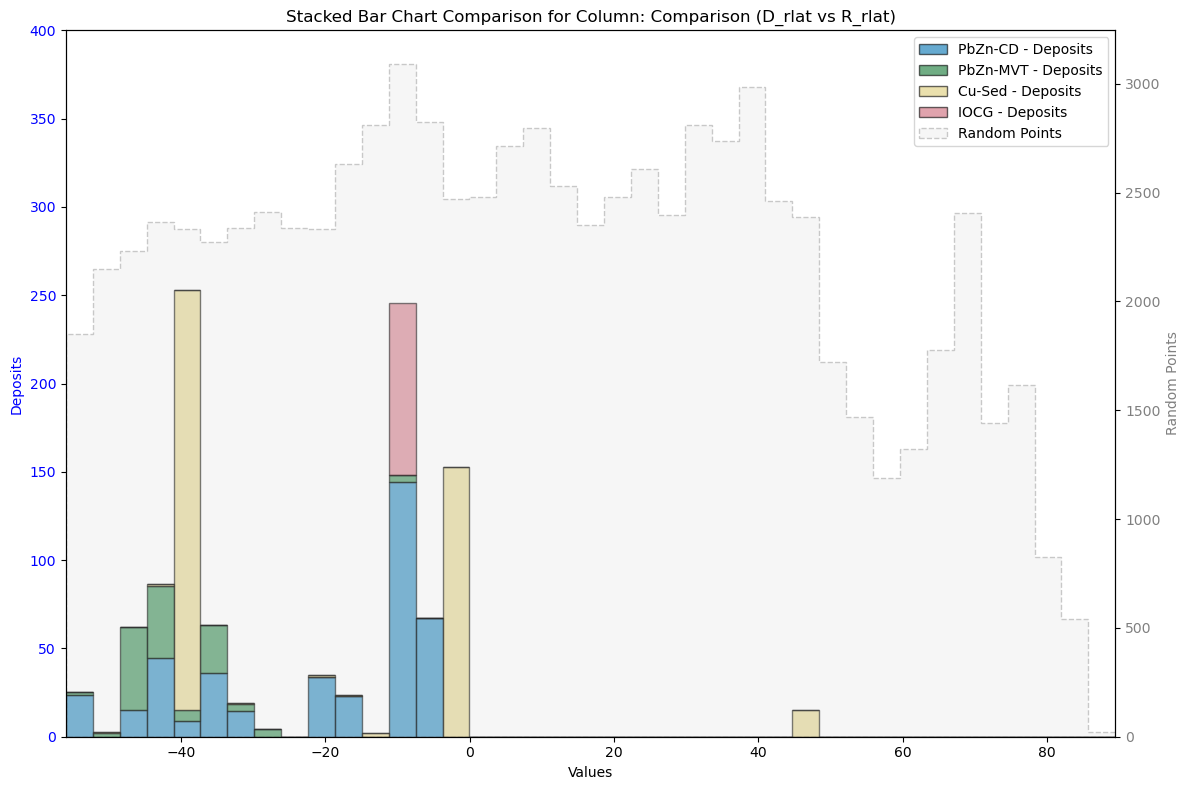

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your CSV file into a DataFrame
file_path = 'deposits_VS_random.csv'  # Update with your file path
df = pd.read_csv(file_path, low_memory=False)

# Define colors based on deposit type
type_colors = {
    'PbZn-CD': '#0072B2',  # Blue
    'PbZn-MVT': '#117733',  # Green
    'Cu-Sed': '#DDCC77',  # Yellow
    'IOCG': '#CC6677'  # Pink
}

# Replace NaN values in 'Type' with 'Unknown'
df['Type'] = df['Type'].fillna('Unknown')

# Function to plot stacked bar charts for deposits and separate random histograms
def plot_stacked_bar_chart_with_random(df, deposit_column, random_column, weights_column, label, type_colors):
    unique_types = df['Type'].unique()
    fig, ax1 = plt.subplots(figsize=(12, 8))
    ax2 = ax1.twinx()  # Create a second y-axis for the random data

    # Define consistent bin edges (using min/max of both data sets)
    min_val = df[deposit_column].min()  # Use minimum value of deposit data
    max_val = max(df[deposit_column].max(), df[random_column].max())
    bin_edges = np.linspace(min_val, max_val, 40)  # 40 bins for consistency
    bin_width = bin_edges[1] - bin_edges[0]

    # Initialize an array to store the bottom position for stacking
    bottom = np.zeros(len(bin_edges) - 1)

    # Plot stacked bars for each deposit type
    for deposit_type in unique_types:
        type_data = df[df['Type'] == deposit_type]
        deposit_data = type_data[deposit_column].dropna()
        deposit_weights = type_data[weights_column]

        if len(deposit_data) > 0:  # Only plot if there is data for this type
            counts, _ = np.histogram(deposit_data, bins=bin_edges, weights=deposit_weights[:len(deposit_data)])
            ax1.bar(
                bin_edges[:-1] + (bin_width / 2),  # Shift bars to start from 0 properly
                counts,
                width=bin_width,
                color=type_colors.get(deposit_type, 'gray'),
                alpha=0.6,
                label=f'{deposit_type} - Deposits',
                edgecolor='black',
                bottom=bottom
            )
            # Update the bottom position for the next stack
            bottom += counts

    # Plot histogram for random data on the right y-axis
    random_data = df[random_column].dropna()
    random_weights = df[weights_column].dropna()

    ax2.hist(
        random_data,
        bins=bin_edges,  # Matching bin size to make comparison meaningful
        color='lightgray',
        alpha=0.2,
        label='Random Points',
        edgecolor='black',  # Thin border for each bar
        linestyle='dashed',
        histtype='stepfilled',
        density=False  # Absolute frequency
    )

    # Customize plot
    ax1.set_xlabel('Values')
    ax1.set_ylabel('Deposits', color='blue')
    ax2.set_ylabel('Random Points', color='gray')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax2.tick_params(axis='y', labelcolor='gray')
    ax1.set_ylim([0, 400])  # Adjust to allow dynamic y-axis scaling
    ax1.set_xlim([min_val, max_val])  # Adjust to cover full range of data

    # Combine legends from both axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

    # Set plot title and layout
    plt.title(f'Stacked Bar Chart Comparison for Column: {label}')
    plt.tight_layout()
    plt.show()

# Plotting for "D_rlat" vs "R_rlat"
plot_stacked_bar_chart_with_random(
    df,
    deposit_column='D_rlat',
    random_column='R_rlat',
    weights_column='TM2',
    label='Comparison (D_rlat vs R_rlat)',
    type_colors=type_colors
)


In [12]:
print(df.columns)

Index(['Type', 'TM2', 'D_cr_ve', 'D_cr_ve_az', 'D_dp_ve', 'D_sb_ve',
       'D_tr_adv', 'D_tr_cr_an', 'D_dp_ve_m', 'D_cr_ve_m', 'D_cr_ve_az_m',
       'D_tr_cr_an_m', 'D_sb_ve_m', 'D_tr_adv_m', 'D_dp_ve_diff',
       'D_cr_ve_diff', 'D_cr_ve_az_diff', 'D_tr_cr_an_diff', 'D_sb_ve_diff',
       'D_tr_adv_diff', 'D_rlat', 'D_sub_len', 'D_sub_len_m', 'D_sub_len_diff',
       'R_cr_ve_diff', 'R_cr_ve', 'R_cr_ve_az_diff', 'R_cr_ve_az',
       'R_dp_ve_diff', 'R_dp_ve', 'R_sb_ve_diff', 'R_sb_ve', 'R_tr_adv_diff',
       'R_tr_adv', 'R_tr_cr_an_diff', 'R_tr_cr_an', 'R_sub_len_diff',
       'R_sub_len', 'R_rlat', 'R_cr_ve_m', 'R_cr_ve_az_m', 'R_dp_ve_m',
       'R_sb_ve_m', 'R_tr_adv_m', 'R_tr_cr_an_m', 'R_sub_len_m'],
      dtype='object')


# Scatterplots

C:\Users\hshi9735\AppData\Local\Temp\ipykernel_22520\2297122181.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


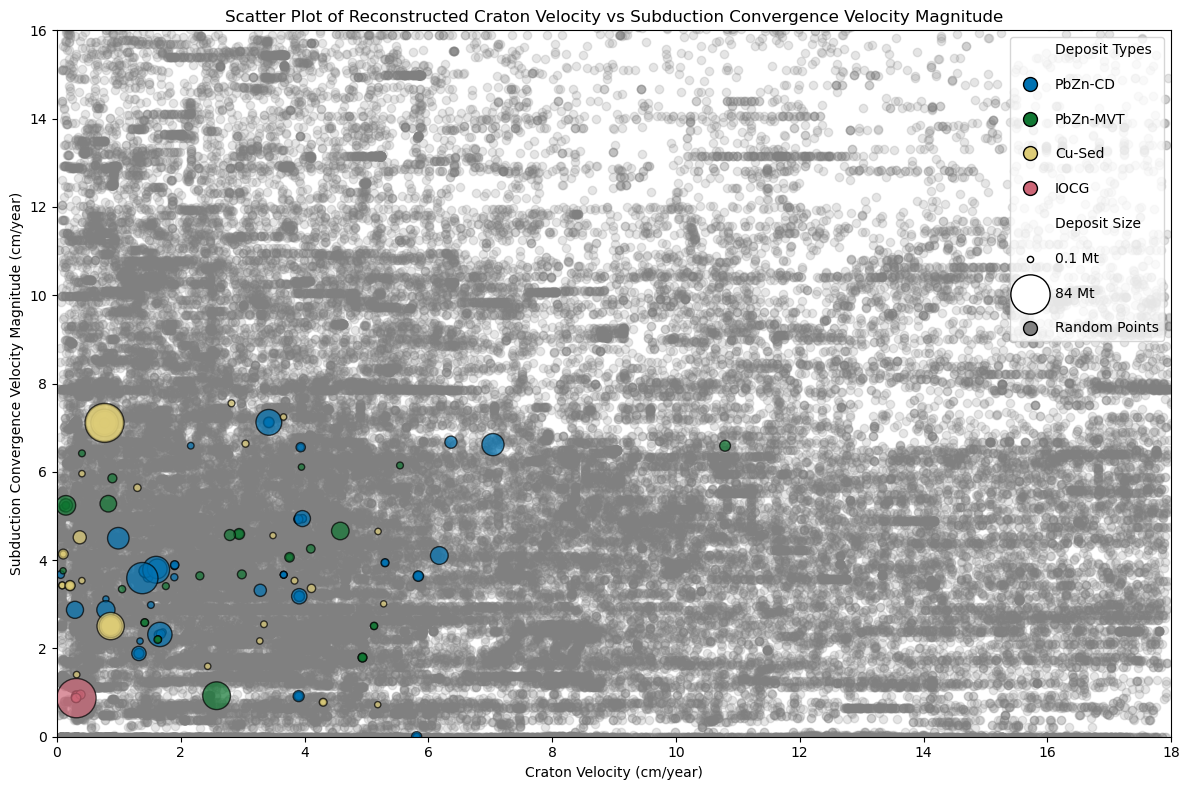

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your CSV file into a DataFrame
file_path = 'deposits_VS_random.csv'  # Update with your file path
df = pd.read_csv(file_path)

# Define columns for deposit and random data
x_deposit = 'D_cr_ve_m'
y_deposit = 'D_sb_ve_m'
x_random = 'R_cr_ve_m'
y_random = 'R_sb_ve_m'
weights_column = 'TM2'

# Select data without filtering NaN
deposit_data = df[[x_deposit, y_deposit, weights_column, 'Type']]
random_data = df[[x_random, y_random]]

# Remove negative values
deposit_data = deposit_data[(deposit_data[x_deposit] >= 0) & (deposit_data[y_deposit] >= 0)]
random_data = random_data[(random_data[x_random] >= 0) & (random_data[y_random] >= 0)]

# Extract data and weights
x_deposit_values = deposit_data[x_deposit]
y_deposit_values = deposit_data[y_deposit]
deposit_weights = deposit_data[weights_column]
deposit_types = deposit_data['Type']

x_random_values = random_data[x_random]
y_random_values = random_data[y_random]

# Define colors based on deposit type (same as bar charts)
type_colors = {
    'PbZn-CD': '#0072B2',  # Blue
    'PbZn-MVT': '#117733',  # Green
    'Cu-Sed': '#DDCC77',  # Yellow
    'IOCG': '#CC6677',  # Pink
    'Unknown': 'gray'  # For any NaN or unknown types
}

# Map TM2 to size using a continuous scale
min_size, max_size = 20, 800  # Minimum and maximum sizes for scaling
scaled_sizes = (deposit_weights - deposit_weights.min()) / (deposit_weights.max() - deposit_weights.min())
scaled_sizes = scaled_sizes * (max_size - min_size) + min_size

# Plot scatter plot
plt.figure(figsize=(12, 8))

# Scatter plot for random points without weights (plot first)
plt.scatter(x_random_values, y_random_values, 
            color='gray', alpha=0.2, label='Random Points', marker='o')  # Ensure circles with `marker='o'`

# Scatter plot for deposits with continuous scaling, colored by type
for deposit_type in deposit_types.unique():
    if pd.isna(deposit_type) or deposit_type == 'Unknown':  # Skip NaN and Unknown
        continue
    type_data = deposit_data[deposit_data['Type'] == deposit_type]
    plt.scatter(type_data[x_deposit], type_data[y_deposit],
                s=scaled_sizes[type_data.index],  # Continuous scaling
                color=type_colors.get(deposit_type, 'gray'),
                edgecolor='black',  # Black edges for deposit points
                alpha=0.7, label=f'{deposit_type}', marker='o')  # Remove "Deposits" from labels

# Add placeholders for Deposit Types, Deposit Size, and Random Points
legend_elements = []

# Add Deposit Types first
legend_elements.append(plt.Line2D([0], [0], label='Deposit Types', color='none'))  # Title for Deposit Types
for deposit_type, color in type_colors.items():
    if deposit_type != 'Unknown':  # Skip Unknown type
        legend_elements.append(plt.Line2D([0], [0], marker='o', color=color, label=deposit_type, markersize=10, 
                                          markeredgecolor='black', linestyle='None'))

# Add Deposit Size second
legend_elements.append(plt.Line2D([0], [0], label='Deposit Size', color='none'))  # Title for Deposit Size
legend_elements.append(plt.scatter([], [], s=min_size, color='white', alpha=1, edgecolor='black', label='0.1 Mt', marker='o'))
legend_elements.append(plt.scatter([], [], s=max_size, color='white', alpha=1, edgecolor='black', label='84 Mt', marker='o'))

# Add Random Points last with a visible black edge in the legend
legend_elements.append(plt.Line2D([0], [0], marker='o', color='gray', label='Random Points',
                                   markersize=10, markeredgecolor='black', markerfacecolor='gray', linestyle='None'))

# Set axis limits between 0 and 18
plt.xlim([0, 18])  # Fixed x-axis range
plt.ylim([0, 16])  # Fixed y-axis range

# Labels and legend
plt.xlabel('Craton Velocity (cm/year)')
plt.ylabel('Subduction Convergence Velocity Magnitude (cm/year)')

# Customize legend with the new order and explicit black edge for Random Points
plt.legend(handles=legend_elements, loc='upper right', frameon=True, labelspacing=1.5)

plt.title('Scatter Plot of Reconstructed Craton Velocity vs Subduction Convergence Velocity Magnitude')
plt.tight_layout()
plt.show()


C:\Users\Hojat\AppData\Local\Temp\ipykernel_23232\3267599102.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


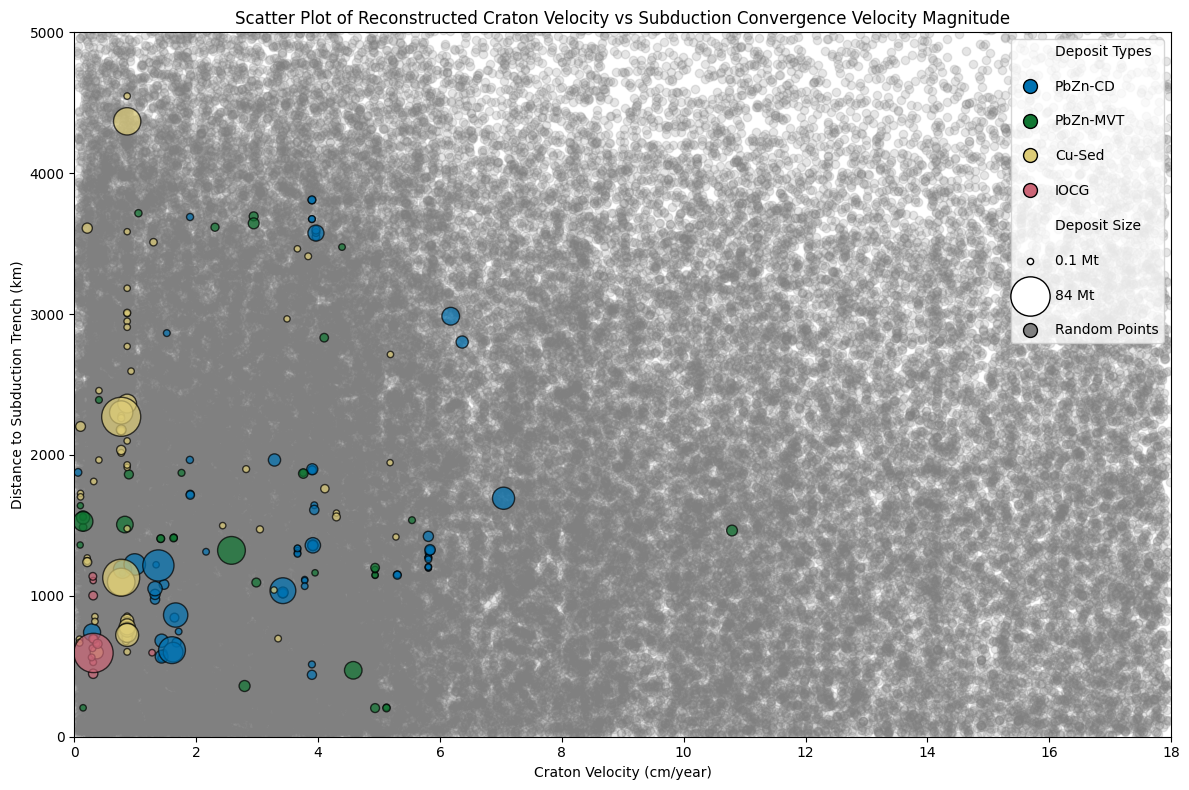

In [170]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your CSV file into a DataFrame
file_path = 'deposits_VS_random.csv'  # Update with your file path
df = pd.read_csv(file_path)

# Define columns for deposit and random data
x_deposit = 'D_cr_ve_m'
y_deposit = 'D_ds_tr'
x_random = 'R_cr_ve_m'
y_random = 'R_ds_tr'
weights_column = 'TM2'

# Select data without filtering NaN
deposit_data = df[[x_deposit, y_deposit, weights_column, 'Type']]
random_data = df[[x_random, y_random]]

# Remove negative values
deposit_data = deposit_data[(deposit_data[x_deposit] >= 0) & (deposit_data[y_deposit] >= 0)]
random_data = random_data[(random_data[x_random] >= 0) & (random_data[y_random] >= 0)]

# Extract data and weights
x_deposit_values = deposit_data[x_deposit]
y_deposit_values = deposit_data[y_deposit]
deposit_weights = deposit_data[weights_column]
deposit_types = deposit_data['Type']

x_random_values = random_data[x_random]
y_random_values = random_data[y_random]

# Define colors based on deposit type (same as bar charts)
type_colors = {
    'PbZn-CD': '#0072B2',  # Blue
    'PbZn-MVT': '#117733',  # Green
    'Cu-Sed': '#DDCC77',  # Yellow
    'IOCG': '#CC6677',  # Pink
    'Unknown': 'gray'  # For any NaN or unknown types
}

# Map TM2 to size using a continuous scale
min_size, max_size = 20, 800  # Minimum and maximum sizes for scaling
scaled_sizes = (deposit_weights - deposit_weights.min()) / (deposit_weights.max() - deposit_weights.min())
scaled_sizes = scaled_sizes * (max_size - min_size) + min_size

# Plot scatter plot
plt.figure(figsize=(12, 8))

# Scatter plot for random points without weights (plot first)
plt.scatter(x_random_values, y_random_values, 
            color='gray', alpha=0.2, label='Random Points', marker='o')  # Ensure circles with `marker='o'`

# Scatter plot for deposits with continuous scaling, colored by type
for deposit_type in deposit_types.unique():
    if pd.isna(deposit_type) or deposit_type == 'Unknown':  # Skip NaN and Unknown
        continue
    type_data = deposit_data[deposit_data['Type'] == deposit_type]
    plt.scatter(type_data[x_deposit], type_data[y_deposit],
                s=scaled_sizes[type_data.index],  # Continuous scaling
                color=type_colors.get(deposit_type, 'gray'),
                edgecolor='black',  # Black edges for deposit points
                alpha=0.7, label=f'{deposit_type}', marker='o')  # Remove "Deposits" from labels

# Add placeholders for Deposit Types, Deposit Size, and Random Points
legend_elements = []

# Add Deposit Types first
legend_elements.append(plt.Line2D([0], [0], label='Deposit Types', color='none'))  # Title for Deposit Types
for deposit_type, color in type_colors.items():
    if deposit_type != 'Unknown':  # Skip Unknown type
        legend_elements.append(plt.Line2D([0], [0], marker='o', color=color, label=deposit_type, markersize=10, 
                                          markeredgecolor='black', linestyle='None'))

# Add Deposit Size second
legend_elements.append(plt.Line2D([0], [0], label='Deposit Size', color='none'))  # Title for Deposit Size
legend_elements.append(plt.scatter([], [], s=min_size, color='white', alpha=1, edgecolor='black', label='0.1 Mt', marker='o'))
legend_elements.append(plt.scatter([], [], s=max_size, color='white', alpha=1, edgecolor='black', label='84 Mt', marker='o'))

# Add Random Points last with a visible black edge in the legend
legend_elements.append(plt.Line2D([0], [0], marker='o', color='gray', label='Random Points',
                                   markersize=10, markeredgecolor='black', markerfacecolor='gray', linestyle='None'))

# Set axis limits between 0 and 18
plt.xlim([0, 18])  # Fixed x-axis range
plt.ylim([0, 5000])  # Fixed y-axis range

# Labels and legend
plt.xlabel('Craton Velocity (cm/year)')
plt.ylabel('Distance to Subduction Trench (km)')

# Customize legend with the new order and explicit black edge for Random Points
plt.legend(handles=legend_elements, loc='upper right', frameon=True, labelspacing=1.5)

plt.title('Scatter Plot of Reconstructed Craton Velocity vs Subduction Convergence Velocity Magnitude')
plt.tight_layout()
plt.show()


C:\Users\Hojat\AppData\Local\Temp\ipykernel_23232\3830330333.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


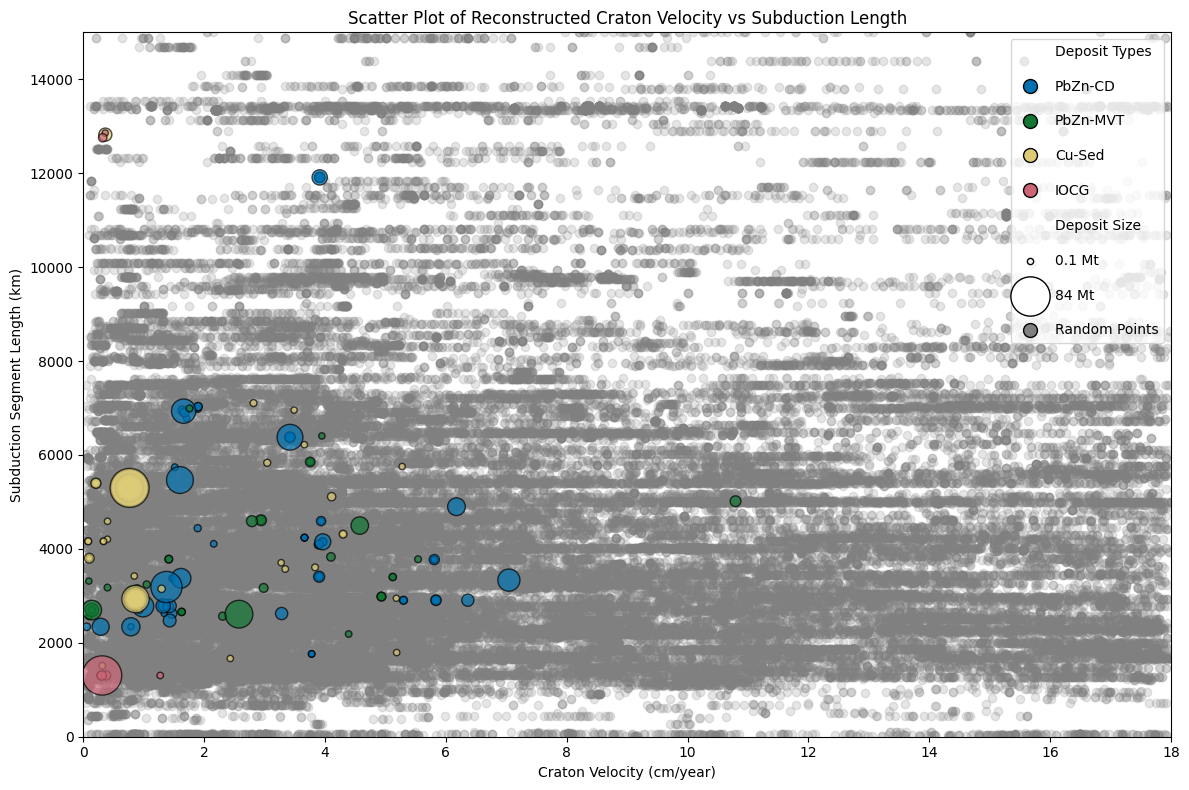

In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your CSV file into a DataFrame
file_path = 'deposits_VS_random.csv'  # Update with your file path
df = pd.read_csv(file_path)

# Define columns for deposit and random data
x_deposit = 'D_cr_ve_m'
y_deposit = 'D_sub_len_m'
x_random = 'R_cr_ve_m'
y_random = 'R_sub_len_m'
weights_column = 'TM2'

# Select data without filtering NaN
deposit_data = df[[x_deposit, y_deposit, weights_column, 'Type']]
random_data = df[[x_random, y_random]]

# Remove negative values
deposit_data = deposit_data[(deposit_data[x_deposit] >= 0) & (deposit_data[y_deposit] >= 0)]
random_data = random_data[(random_data[x_random] >= 0) & (random_data[y_random] >= 0)]

# Extract data and weights
x_deposit_values = deposit_data[x_deposit]
y_deposit_values = deposit_data[y_deposit]
deposit_weights = deposit_data[weights_column]
deposit_types = deposit_data['Type']

x_random_values = random_data[x_random]
y_random_values = random_data[y_random]

# Define colors based on deposit type (same as bar charts)
type_colors = {
    'PbZn-CD': '#0072B2',  # Blue
    'PbZn-MVT': '#117733',  # Green
    'Cu-Sed': '#DDCC77',  # Yellow
    'IOCG': '#CC6677',  # Pink
    'Unknown': 'gray'  # For any NaN or unknown types
}

# Map TM2 to size using a continuous scale
min_size, max_size = 20, 800  # Minimum and maximum sizes for scaling
scaled_sizes = (deposit_weights - deposit_weights.min()) / (deposit_weights.max() - deposit_weights.min())
scaled_sizes = scaled_sizes * (max_size - min_size) + min_size

# Plot scatter plot
plt.figure(figsize=(12, 8))

# Scatter plot for random points without weights (plot first)
plt.scatter(x_random_values, y_random_values, 
            color='gray', alpha=0.2, label='Random Points', marker='o')  # Ensure circles with `marker='o'`

# Scatter plot for deposits with continuous scaling, colored by type
for deposit_type in deposit_types.unique():
    if pd.isna(deposit_type) or deposit_type == 'Unknown':  # Skip NaN and Unknown
        continue
    type_data = deposit_data[deposit_data['Type'] == deposit_type]
    plt.scatter(type_data[x_deposit], type_data[y_deposit],
                s=scaled_sizes[type_data.index],  # Continuous scaling
                color=type_colors.get(deposit_type, 'gray'),
                edgecolor='black',  # Black edges for deposit points
                alpha=0.7, label=f'{deposit_type}', marker='o')  # Remove "Deposits" from labels

# Add placeholders for Deposit Types, Deposit Size, and Random Points
legend_elements = []

# Add Deposit Types first
legend_elements.append(plt.Line2D([0], [0], label='Deposit Types', color='none'))  # Title for Deposit Types
for deposit_type, color in type_colors.items():
    if deposit_type != 'Unknown':  # Skip Unknown type
        legend_elements.append(plt.Line2D([0], [0], marker='o', color=color, label=deposit_type, markersize=10, 
                                          markeredgecolor='black', linestyle='None'))

# Add Deposit Size second
legend_elements.append(plt.Line2D([0], [0], label='Deposit Size', color='none'))  # Title for Deposit Size
legend_elements.append(plt.scatter([], [], s=min_size, color='white', alpha=1, edgecolor='black', label='0.1 Mt', marker='o'))
legend_elements.append(plt.scatter([], [], s=max_size, color='white', alpha=1, edgecolor='black', label='84 Mt', marker='o'))

# Add Random Points last with a visible black edge in the legend
legend_elements.append(plt.Line2D([0], [0], marker='o', color='gray', label='Random Points',
                                   markersize=10, markeredgecolor='black', markerfacecolor='gray', linestyle='None'))

# Set axis limits between 0 and 18
plt.xlim([0, 18])  # Fixed x-axis range
plt.ylim([0, 15000])  # Fixed y-axis range

# Labels and legend
plt.xlabel('Craton Velocity (cm/year)')
plt.ylabel('Subduction Segment Length (km)')

# Customize legend with the new order and explicit black edge for Random Points
plt.legend(handles=legend_elements, loc='upper right', frameon=True, labelspacing=1.5)

plt.title('Scatter Plot of Reconstructed Craton Velocity vs Subduction Length')
plt.tight_layout()
plt.show()


# Box-Violin Plot

C:\Users\Hojat\AppData\Local\Temp\ipykernel_23232\3635874422.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


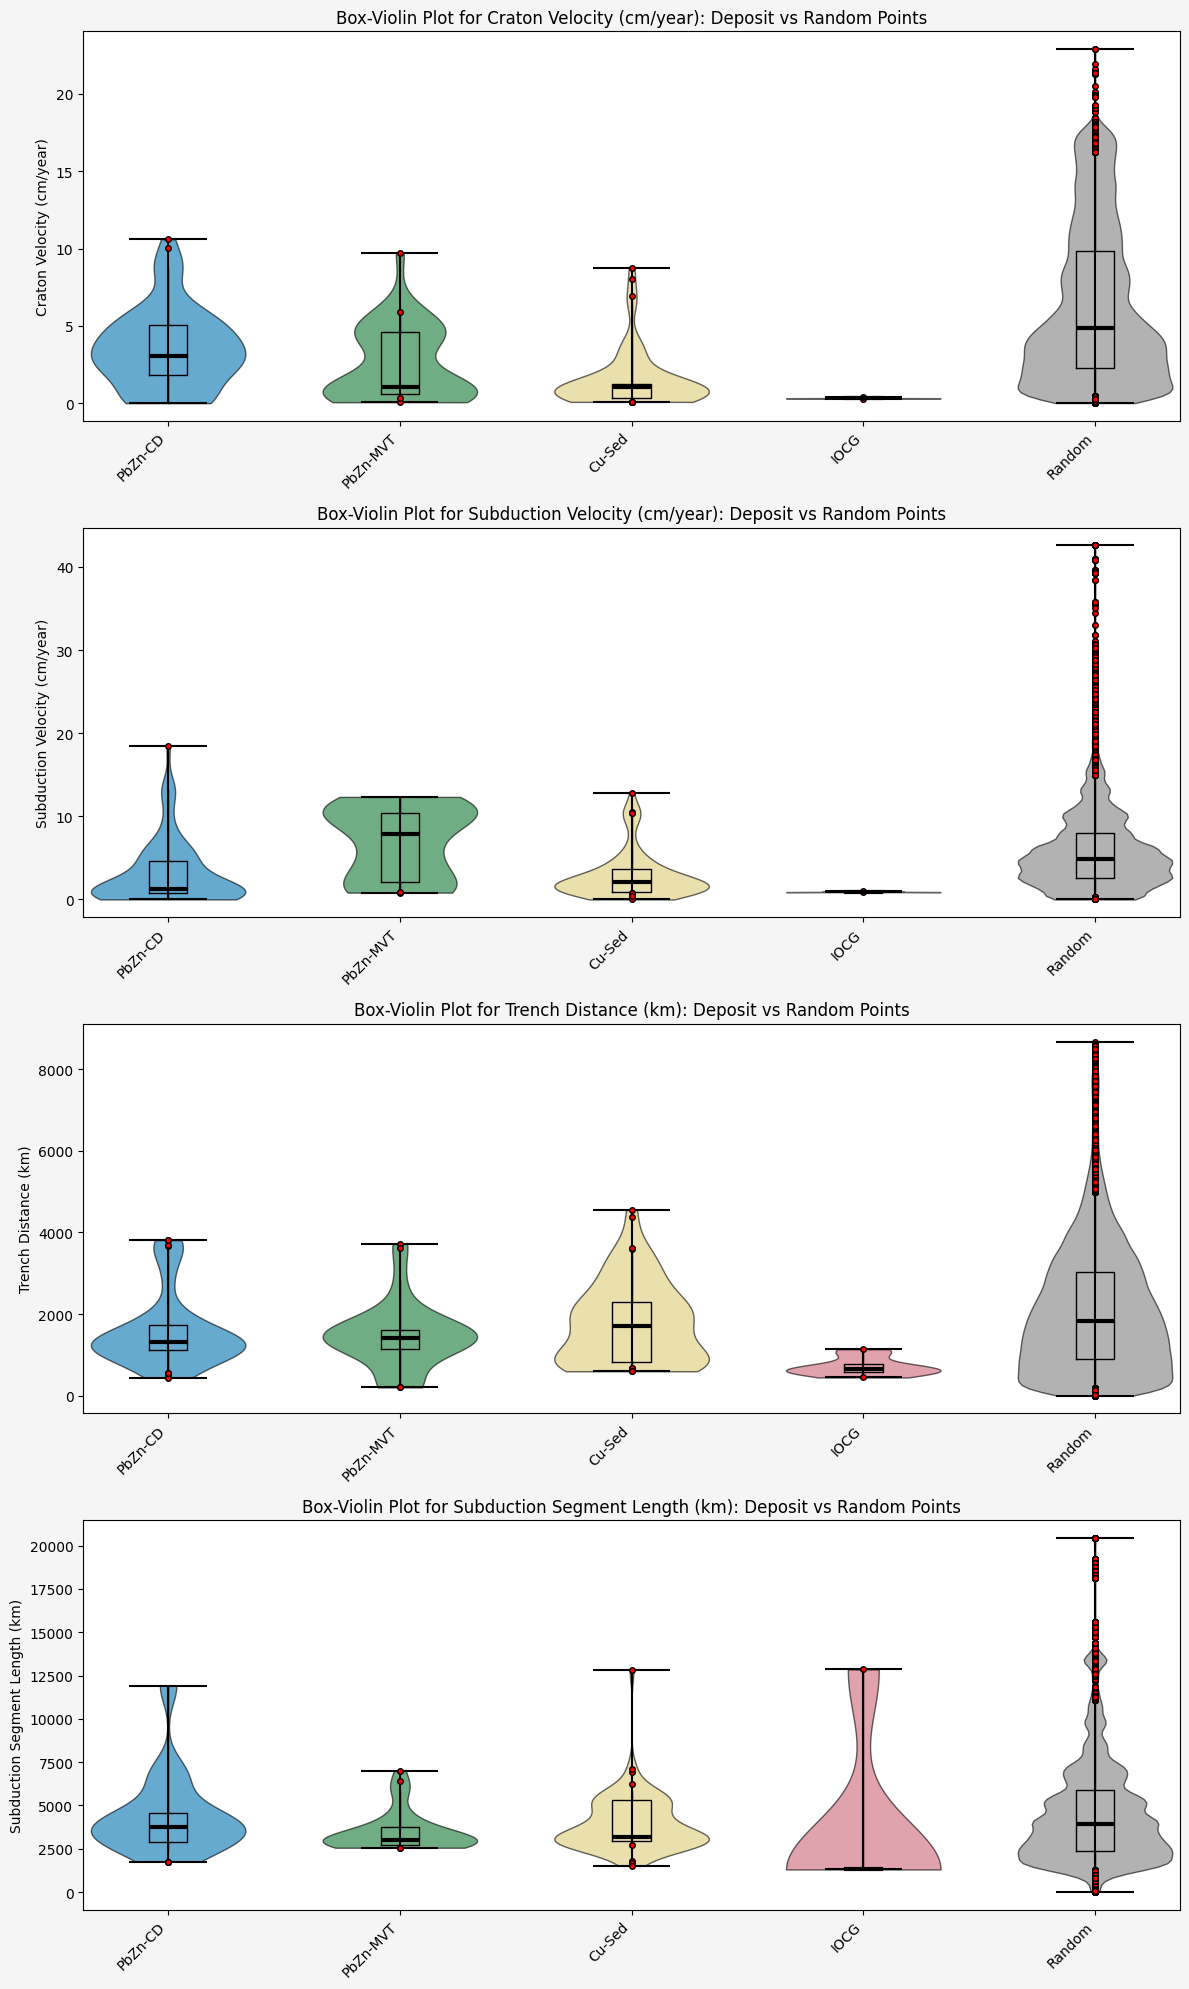

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your CSV file into a DataFrame
file_path = 'deposits_VS_random.csv'  # Update with your file path
df = pd.read_csv(file_path)

# Define deposit and random data columns
columns_to_plot = [
    ("D_cr_ve", "R_cr_ve", "Craton Velocity (cm/year)"),
    ("D_sb_ve", "R_sb_ve", "Subduction Velocity (cm/year)"),
    ("D_ds_tr", "R_ds_tr", "Trench Distance (km)"),
    ("D_sub_len_m", "R_sub_len_m", "Subduction Segment Length (km)")
]

# Drop NaN values and filter out negative values for deposits and random data
deposit_data = df.dropna(subset=[col[0] for col in columns_to_plot] + ['Type', 'TM2'])
deposit_data = deposit_data[(deposit_data[[col[0] for col in columns_to_plot]] >= 0).all(axis=1)]

random_data = df.dropna(subset=[col[1] for col in columns_to_plot])
random_data = random_data[(random_data[[col[1] for col in columns_to_plot]] >= 0).all(axis=1)]

# Define colors based on deposit type
type_colors = {
    'PbZn-CD': '#0072B2',  # Blue
    'PbZn-MVT': '#117733',  # Green
    'Cu-Sed': '#DDCC77',  # Yellow
    'IOCG': '#CC6677',  # Pink
    'Unknown': 'gray'  # For any NaN or unknown types
}

# Create subplots for all metrics
num_plots = len(columns_to_plot)
fig, axes = plt.subplots(num_plots, 1, figsize=(12, 5 * num_plots))
fig.set_facecolor('whitesmoke')

# Loop through each pair of deposit and random columns for plotting
for i, (x_deposit, x_random, ylabel) in enumerate(columns_to_plot):
    ax = axes[i] if num_plots > 1 else axes
    position_offset = 0
    position_step = 0.3

    # Extract random data for the current metric
    plot_data_random = random_data[x_random].dropna()

    for deposit_type in deposit_data['Type'].unique():
        # Filter data for the current deposit type
        deposit_type_data = deposit_data[deposit_data['Type'] == deposit_type]
        plot_data_deposit = deposit_type_data[x_deposit].dropna()

        # Plot deposit data
        positions = [position_offset]
        vplot_parts = ax.violinplot([plot_data_deposit], positions=positions, widths=0.2)
        bp = ax.boxplot(
            [plot_data_deposit], positions=positions, widths=0.05, patch_artist=False, whis=(5, 95),
            flierprops=dict(marker='.', markersize=8, markerfacecolor='red', markeredgecolor='black'),
            medianprops=dict(color='black', linewidth=3),
            whiskerprops=dict(color='black', linestyle='-'),
            capprops=dict(visible=False)
        )

        # Style violin plot for deposits
        for body in vplot_parts['bodies']:
            body.set_facecolor(type_colors.get(deposit_type, 'lightblue'))
            body.set_edgecolor('black')
            body.set_alpha(0.6)

        vplot_parts['cbars'].set_edgecolor('black')
        vplot_parts['cmins'].set_edgecolor('black')
        vplot_parts['cmaxes'].set_edgecolor('black')

        position_offset += position_step

    # Add random data to the right of all deposit types
    vplot_random = ax.violinplot([plot_data_random], positions=[position_offset], widths=0.2)
    bp_random = ax.boxplot(
        [plot_data_random], positions=[position_offset], widths=0.05, patch_artist=False, whis=(5, 95),
        flierprops=dict(marker='.', markersize=8, markerfacecolor='red', markeredgecolor='black'),
        medianprops=dict(color='black', linewidth=3),
        whiskerprops=dict(color='black', linestyle='-'),
        capprops=dict(visible=False)
    )

    # Style violin plot for random data
    for body in vplot_random['bodies']:
        body.set_facecolor('gray')
        body.set_edgecolor('black')
        body.set_alpha(0.6)

    vplot_random['cbars'].set_edgecolor('black')
    vplot_random['cmins'].set_edgecolor('black')
    vplot_random['cmaxes'].set_edgecolor('black')

    # Format axes
    ax.set_xticks(list(np.arange(0, position_offset, position_step)) + [position_offset])
    ax.set_xticklabels(list(deposit_data['Type'].unique()) + ['Random'], rotation=45, ha='right')
    ax.set_xlim(-0.11, position_offset + 0.11)
    ax.set_ylabel(ylabel)
    ax.set_title(f'Box-Violin Plot for {ylabel}: Deposits vs Random Points')

plt.tight_layout()
plt.show()


C:\Users\Hojat\AppData\Local\Temp\ipykernel_23232\503418761.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


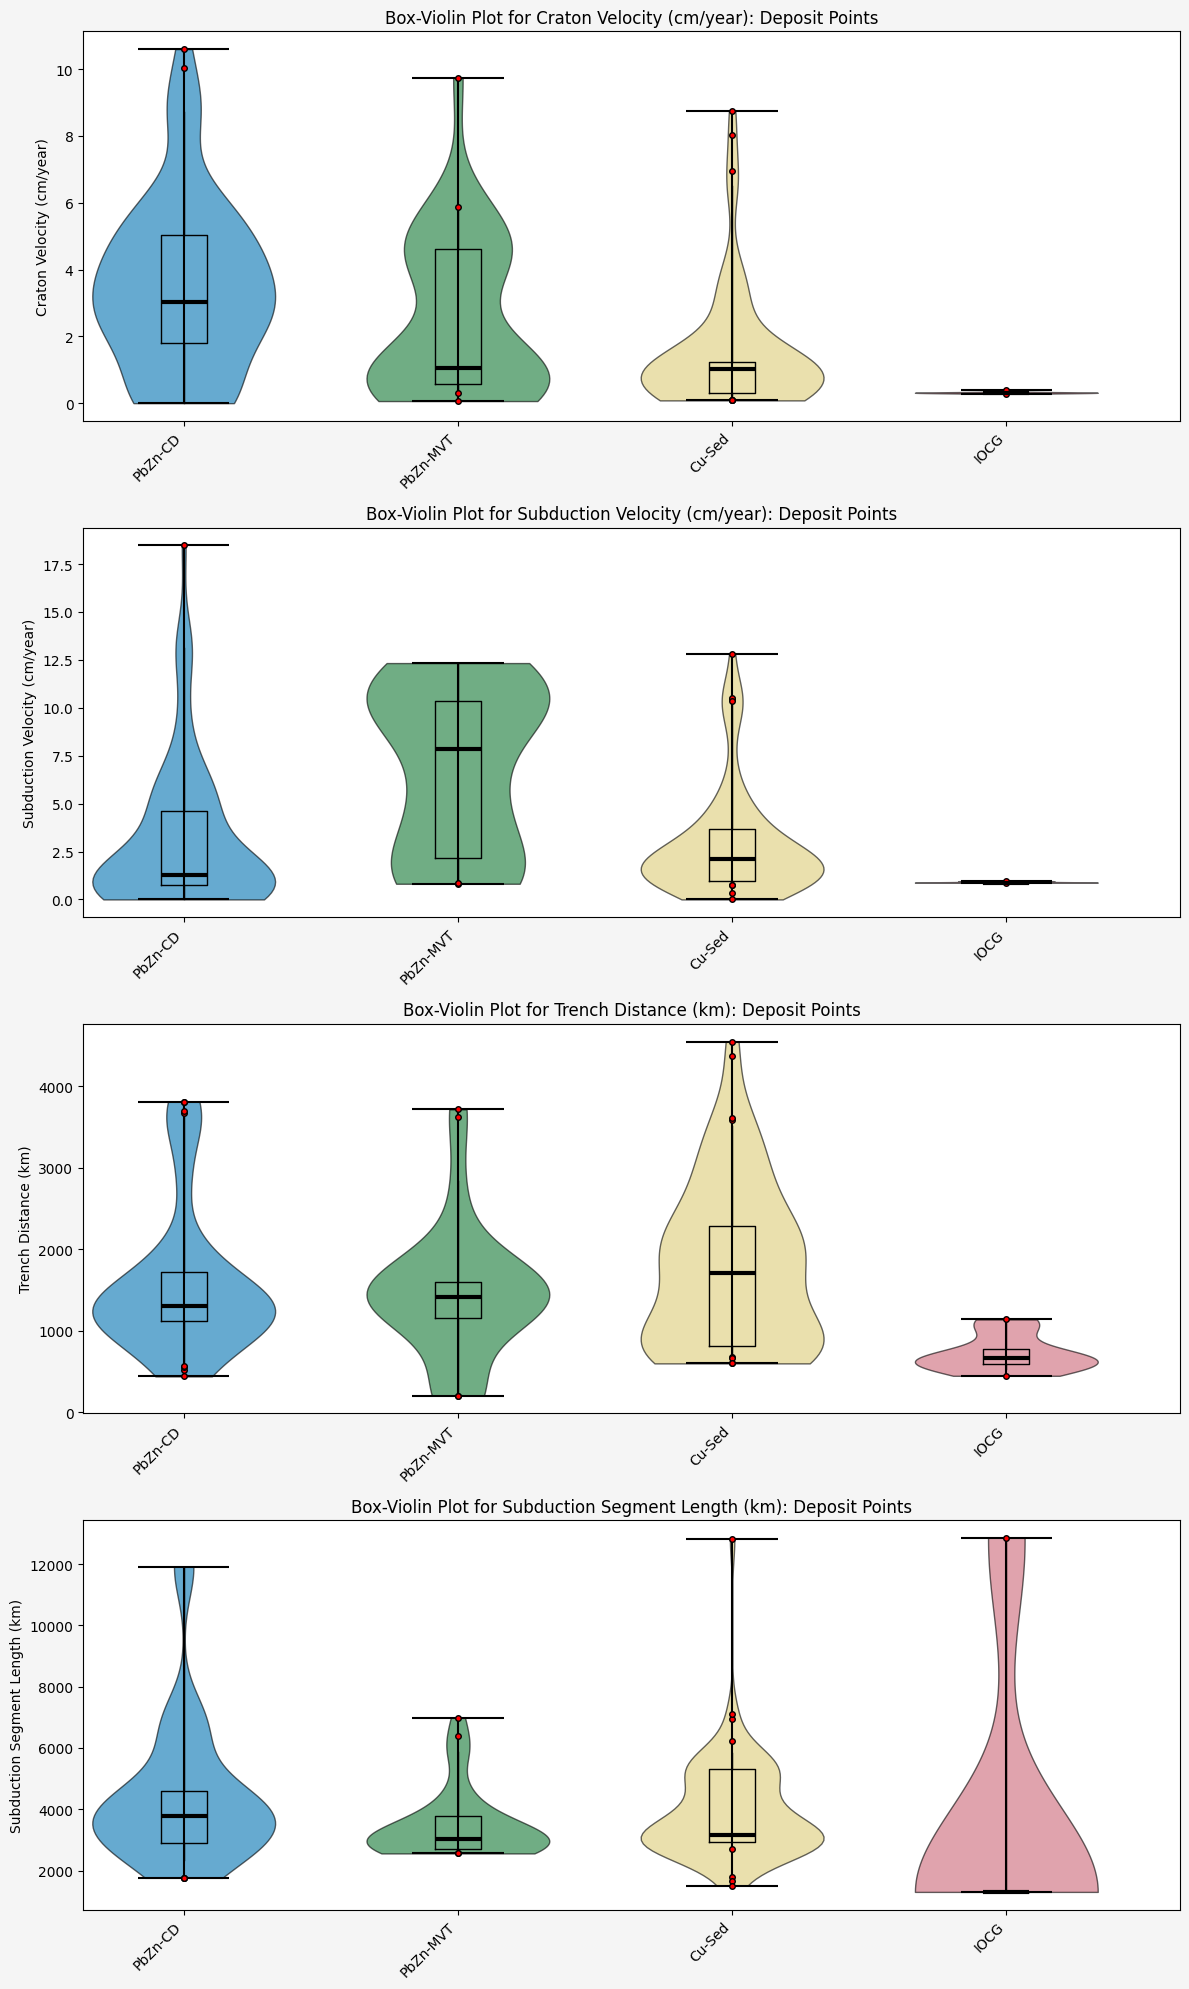

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your CSV file into a DataFrame
file_path = 'deposits_VS_random.csv'  # Update with your file path
df = pd.read_csv(file_path)

# Define deposit data columns
columns_to_plot = [
    ("D_cr_ve", "Craton Velocity (cm/year)"),
    ("D_sb_ve", "Subduction Velocity (cm/year)"),
    ("D_ds_tr", "Trench Distance (km)"),
    ("D_sub_len_m", "Subduction Segment Length (km)")
]

# Drop NaN values and filter out negative values for deposits
deposit_data = df.dropna(subset=[col[0] for col in columns_to_plot] + ['Type', 'TM2'])
deposit_data = deposit_data[(deposit_data[[col[0] for col in columns_to_plot]] >= 0).all(axis=1)]

# Define colors based on deposit type
type_colors = {
    'PbZn-CD': '#0072B2',  # Blue
    'PbZn-MVT': '#117733',  # Green
    'Cu-Sed': '#DDCC77',  # Yellow
    'IOCG': '#CC6677',  # Pink
    'Unknown': 'gray'  # For any NaN or unknown types
}

# Create subplots for all metrics
num_plots = len(columns_to_plot)
fig, axes = plt.subplots(num_plots, 1, figsize=(12, 5 * num_plots))
fig.set_facecolor('whitesmoke')

# Loop through each column for plotting
for i, (x_deposit, ylabel) in enumerate(columns_to_plot):
    ax = axes[i] if num_plots > 1 else axes
    position_offset = 0
    position_step = 0.3

    for deposit_type in deposit_data['Type'].unique():
        # Filter data for the current deposit type
        deposit_type_data = deposit_data[deposit_data['Type'] == deposit_type]
        plot_data_deposit = deposit_type_data[x_deposit].dropna()

        # Plot deposit data
        positions = [position_offset]
        vplot_parts = ax.violinplot([plot_data_deposit], positions=positions, widths=0.2)
        bp = ax.boxplot(
            [plot_data_deposit], positions=positions, widths=0.05, patch_artist=False, whis=(5, 95),
            flierprops=dict(marker='.', markersize=8, markerfacecolor='red', markeredgecolor='black'),
            medianprops=dict(color='black', linewidth=3),
            whiskerprops=dict(color='black', linestyle='-'),
            capprops=dict(visible=False)
        )

        # Style violin plot for deposits
        for body in vplot_parts['bodies']:
            body.set_facecolor(type_colors.get(deposit_type, 'lightblue'))
            body.set_edgecolor('black')
            body.set_alpha(0.6)

        vplot_parts['cbars'].set_edgecolor('black')
        vplot_parts['cmins'].set_edgecolor('black')
        vplot_parts['cmaxes'].set_edgecolor('black')

        position_offset += position_step

    # Format axes
    ax.set_xticks(list(np.arange(0, position_offset, position_step)))
    ax.set_xticklabels(list(deposit_data['Type'].unique()), rotation=45, ha='right')
    ax.set_xlim(-0.11, position_offset - 0.11)
    ax.set_ylabel(ylabel)
    ax.set_title(f'Box-Violin Plot for {ylabel}: Deposits')

plt.tight_layout()
plt.show()


C:\Users\Hojat\AppData\Local\Temp\ipykernel_23232\1409141005.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


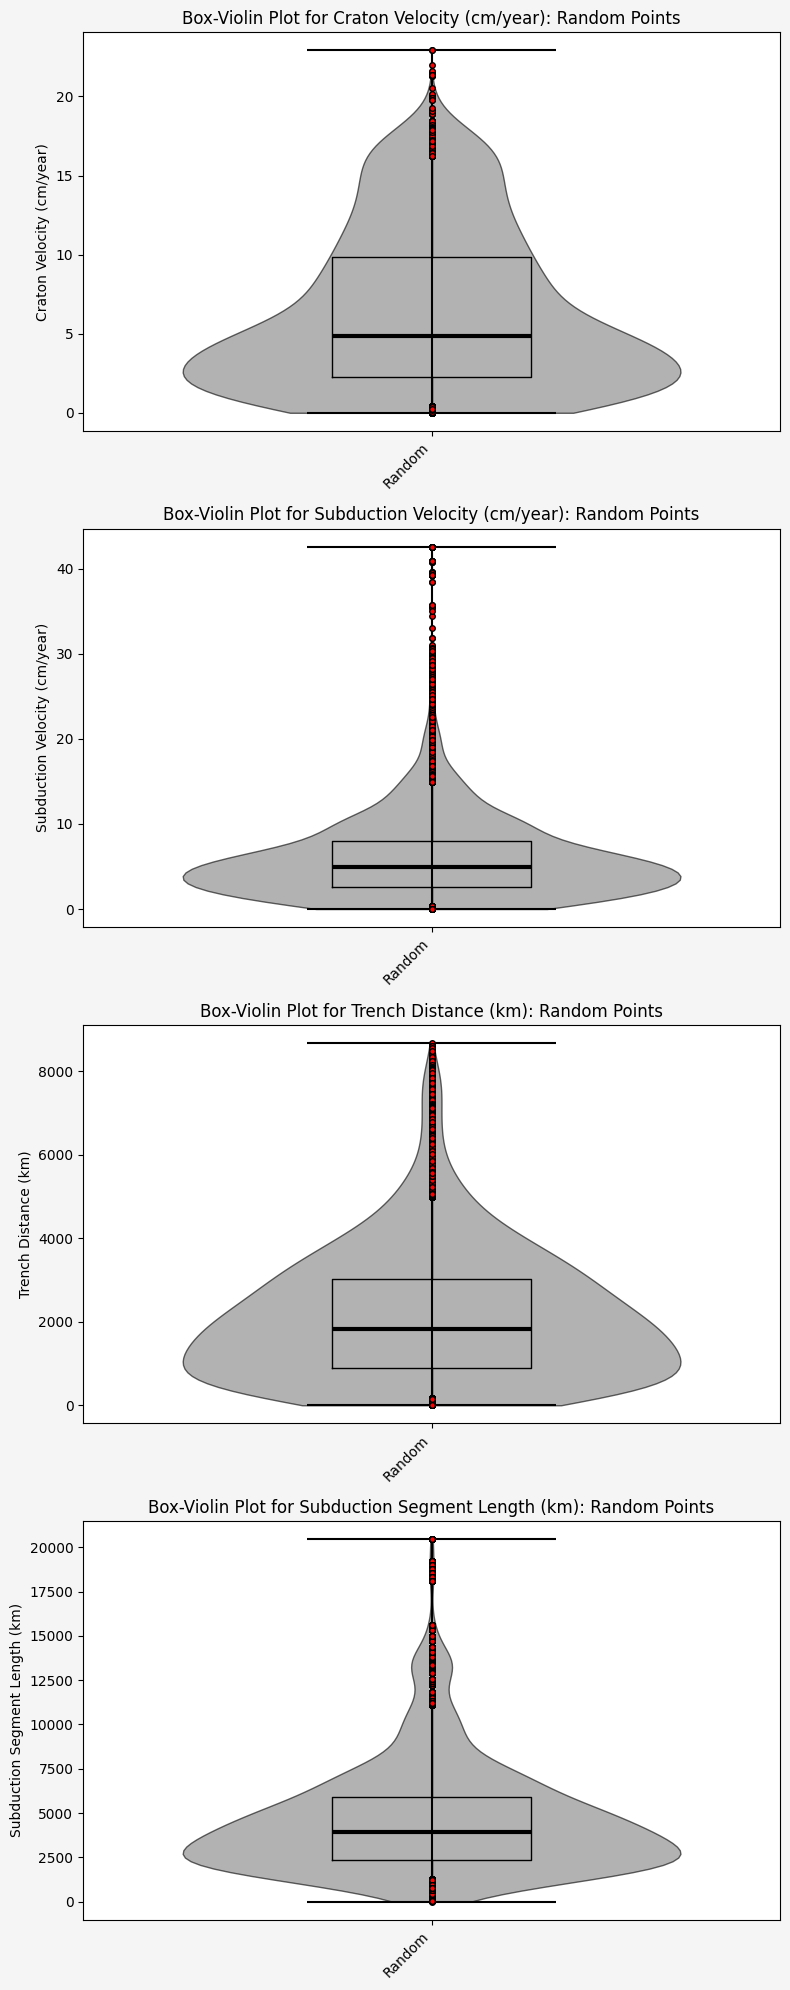

In [158]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the uploaded CSV file into a DataFrame
file_path = './deposits_VS_random.csv'
df = pd.read_csv(file_path)

# Define random data columns and their labels for plotting
columns_to_plot = [
    ("R_cr_ve", "Craton Velocity (cm/year)"),
    ("R_sb_ve", "Subduction Velocity (cm/year)"),
    ("R_ds_tr", "Trench Distance (km)"),
    ("R_sub_len_m", "Subduction Segment Length (km)")
]

# Drop NaN values and filter out negative values for random points
random_data = df.dropna(subset=[col[0] for col in columns_to_plot])
random_data = random_data[(random_data[[col[0] for col in columns_to_plot]] >= 0).all(axis=1)]

# Create subplots for all metrics
num_plots = len(columns_to_plot)
fig, axes = plt.subplots(num_plots, 1, figsize=(8, 5 * num_plots))
fig.set_facecolor('whitesmoke')

# Loop through each column for plotting
for i, (x_random, ylabel) in enumerate(columns_to_plot):
    ax = axes[i] if num_plots > 1 else axes
    position_offset = 0

    # Extract data for the current metric
    plot_data_random = random_data[x_random].dropna()

    # Plot random data with narrower violin width and adjusted bandwidth
    positions = [position_offset]
    vplot_parts = ax.violinplot(
        [plot_data_random], positions=positions, widths=0.05, bw_method=0.3
    )  # Narrow width and lower bandwidth for slimmer plots
    bp = ax.boxplot(
        [plot_data_random], positions=positions, widths=0.02, patch_artist=False, whis=(5, 95),
        flierprops=dict(marker='.', markersize=8, markerfacecolor='red', markeredgecolor='black'),
        medianprops=dict(color='black', linewidth=3),
        whiskerprops=dict(color='black', linestyle='-'),
        capprops=dict(visible=False)
    )

    # Style violin plot for random data
    for body in vplot_parts['bodies']:
        body.set_facecolor('gray')
        body.set_edgecolor('black')
        body.set_alpha(0.6)

    vplot_parts['cbars'].set_edgecolor('black')
    vplot_parts['cmins'].set_edgecolor('black')
    vplot_parts['cmaxes'].set_edgecolor('black')

    # Format axes
    ax.set_xticks([position_offset])
    ax.set_xticklabels(['Random'], rotation=45, ha='right')
    ax.set_xlim(-0.035, position_offset + 0.035)
    ax.set_ylabel(ylabel)
    ax.set_title(f'Box-Violin Plot for {ylabel}: Random Points')

plt.tight_layout()
plt.show()


C:\Users\Hojat\AppData\Local\Temp\ipykernel_23232\1238298069.py:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


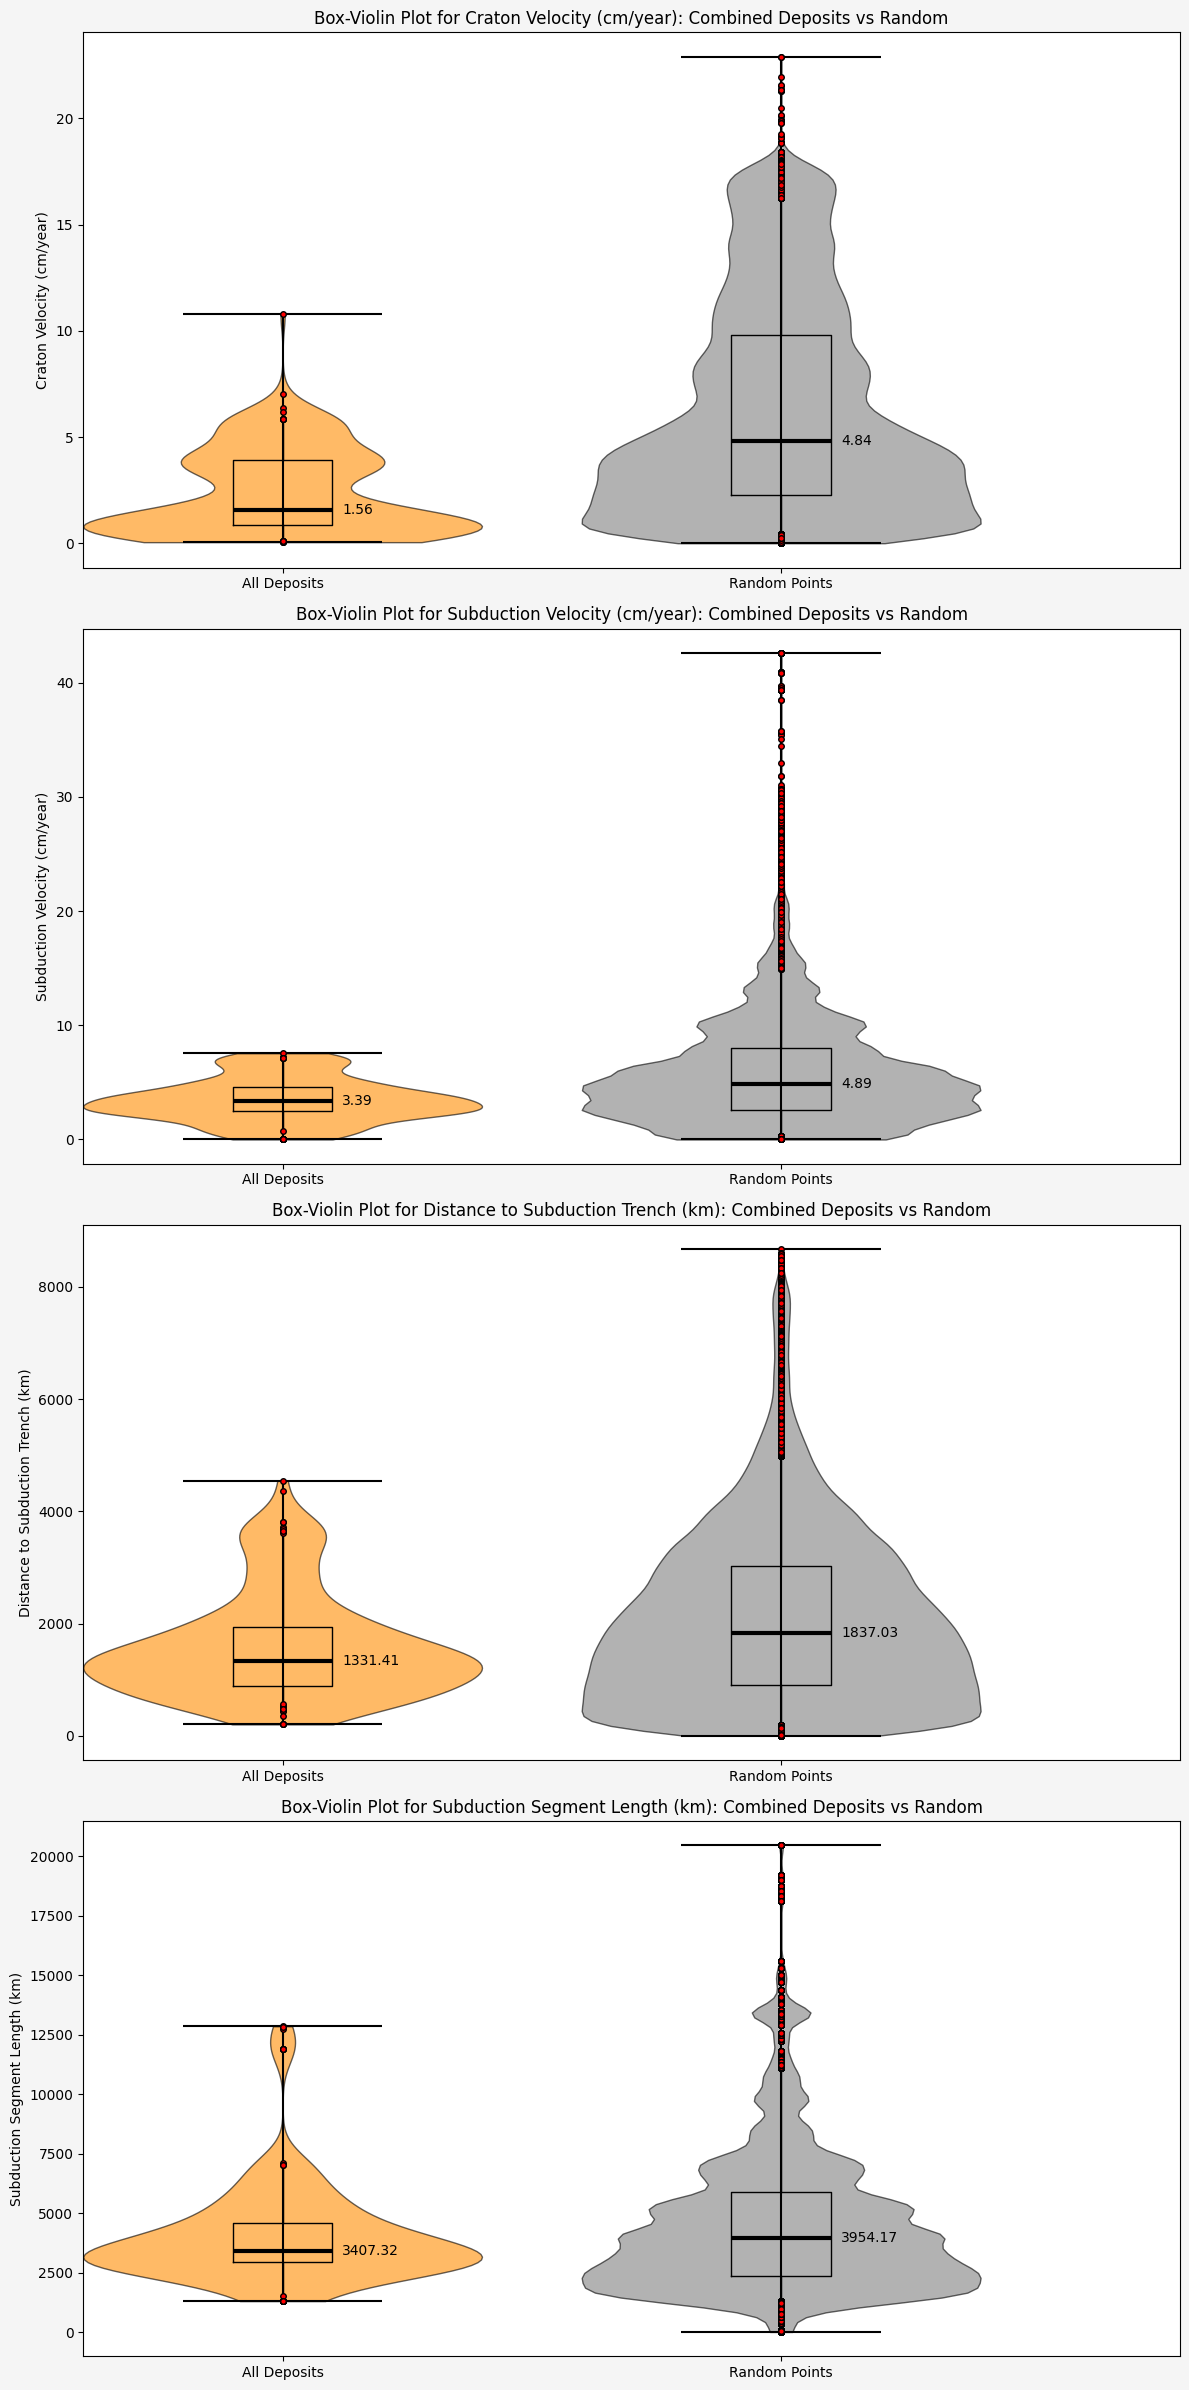

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Load your CSV file into a DataFrame
file_path = './deposits_VS_random.csv'  # Path to your uploaded file
df = pd.read_csv(file_path)

# Define columns for deposit and random data
features = [
    ("D_cr_ve_m", "R_cr_ve_m", "Craton Velocity (cm/year)"),
    ("D_sb_ve_m", "R_sb_ve_m", "Subduction Velocity (cm/year)"),
    ("D_ds_tr", "R_ds_tr", "Distance to Subduction Trench (km)"),
    ("D_sub_len_m", "R_sub_len_m", "Subduction Segment Length (km)"),
]
weights_column = 'TM2'

# Define colors
deposit_color = mcolors.CSS4_COLORS['darkorange']  # Colorblind-safe red-orange
random_color = 'gray'
position_offset_random = 0.25  # Adjust position to avoid overlap

# Drop NaN values for deposits and random points
deposit_data = df[[col[0] for col in features] + [weights_column, 'Type']].dropna()
random_data = df[[col[1] for col in features]].dropna()

# Remove negative values
for col in [col[0] for col in features]:
    deposit_data = deposit_data[deposit_data[col] >= 0]

for col in [col[1] for col in features]:
    random_data = random_data[random_data[col] >= 0]

# Combine all deposit types into a single category
deposit_data_combined = deposit_data.copy()
deposit_data_combined['Type'] = 'Combined'

# Create subplots for all features with adjusted positions and median labels
num_features = len(features)
fig, axes = plt.subplots(num_features, 1, figsize=(12, 6 * num_features))
fig.set_facecolor('whitesmoke')

# Loop through each feature and plot
for i, (deposit_col, random_col, ylabel) in enumerate(features):
    ax = axes[i] if num_features > 1 else axes

    # Extract data for combined deposits and random points
    plot_data_deposit = deposit_data_combined[deposit_col]
    plot_data_random = random_data[random_col]

    # Positioning for violin plots
    positions = [0, position_offset_random]

    # Plot combined deposit data and random data
    vplot_parts = ax.violinplot([plot_data_deposit, plot_data_random], positions=positions, widths=0.2)
    bp = ax.boxplot(
        [plot_data_deposit, plot_data_random], positions=positions, widths=0.05, patch_artist=False, whis=(5, 95),
        flierprops=dict(marker='.', markersize=8, markerfacecolor='red', markeredgecolor='black'),
        medianprops=dict(color='black', linewidth=3),
        whiskerprops=dict(color='black', linestyle='-'),
        capprops=dict(visible=False)
    )

    # Style violin plots
    for j, body in enumerate(vplot_parts['bodies']):
        if j == 0:  # Combined deposit data
            body.set_facecolor(deposit_color)  # Red-orange for combined deposits
        else:  # Random data
            body.set_facecolor(random_color)  # Gray for random points
        body.set_edgecolor('black')
        body.set_alpha(0.6)

    vplot_parts['cbars'].set_edgecolor('black')
    vplot_parts['cmins'].set_edgecolor('black')
    vplot_parts['cmaxes'].set_edgecolor('black')

    # Calculate and label median values further to the right of the median line
    deposit_median = plot_data_deposit.median()
    random_median = plot_data_random.median()
    ax.text(positions[0] + 0.03, deposit_median,  # Offset label further to the right of the median line
            f'{deposit_median:.2f}', color='black', ha='left', va='center', fontsize=10)
    ax.text(positions[1] + 0.03, random_median,  # Offset label further to the right of the median line
            f'{random_median:.2f}', color='black', ha='left', va='center', fontsize=10)

    # Format axes
    ax.set_xticks(positions)
    ax.set_xticklabels(['All Deposits', 'Random Points'], rotation=0,)
    ax.set_xlim(-0.1, position_offset_random + 0.2)
    ax.set_ylabel(ylabel)
    ax.set_title(f'Box-Violin Plot for {ylabel}: Combined Deposits vs Random')

plt.tight_layout()
plt.show()


# 3-axis stacked bar chart

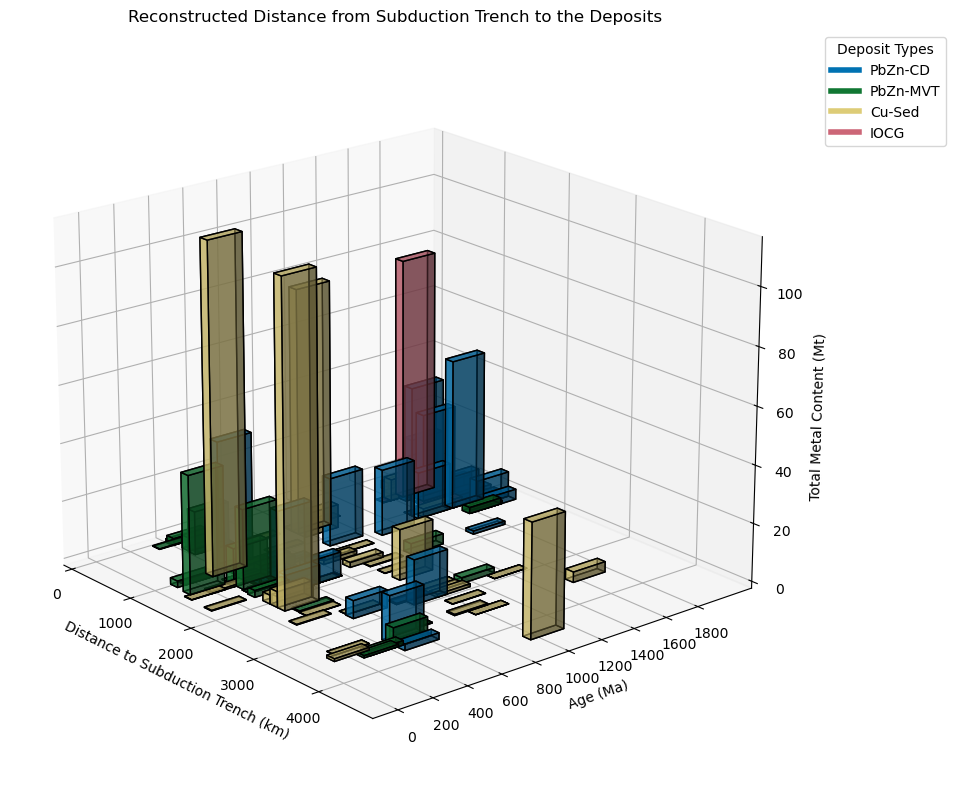

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = './deposits_VS_random.csv'  # Replace with your file path
data = pd.read_csv(file_path, low_memory=False)

# Remove rows with NaN values in relevant columns
filtered_data = data.dropna(subset=['D_ds_tr', 'Age', 'TM2', 'Type'])

# Define custom colors
custom_colors = ['#0072B2', '#117733', '#DDCC77', '#CC6677']


# Ensure the same bin size as in the previous charts
previous_min_val = 0  # Start from 0 as in the previous code
previous_max_val = filtered_data['D_ds_tr'].max()
num_bins = 40  # Same number of bins as in the previous examples
bin_edges = np.linspace(previous_min_val, previous_max_val, num_bins)
x_bins = bin_edges  # Use the same binning approach
x_positions = (x_bins[:-1] + x_bins[1:]) / 2  # Bin centers

# Prepare Y-axis intervals with steps of 200
y_ticks = np.arange(0, filtered_data['Age'].max() + 200, 200)

# Create the 3D bar chart
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Adjust the view to 10 degrees from the Age axis
ax.view_init(elev=20, azim=-40)

# Map deposit types to custom colors
deposit_types = filtered_data['Type'].unique()
type_color_mapping = {deposit_type: custom_colors[i % len(custom_colors)] for i, deposit_type in enumerate(deposit_types)}

# Iterate through bins (X-axis: D_ds_tr) and ages (Y-axis) to plot bars (Z-axis: Weighted Number of Deposits)
for j, age in enumerate(filtered_data['Age'].unique()):
    for i in range(len(x_bins) - 1):
        subset = filtered_data[(filtered_data['D_ds_tr'] >= x_bins[i]) &
                               (filtered_data['D_ds_tr'] < x_bins[i + 1]) &
                               (filtered_data['Age'] == age)]
        if not subset.empty:
            weighted_count = subset['TM2'].sum()  # Sum of weights for the number of deposits
            deposit_type = subset['Type'].iloc[0]  # Get the deposit type for the subset
            ax.bar3d(
                x_positions[i], age, 0,  # X, Y, and starting Z positions
                x_bins[1] - x_bins[0], 200, weighted_count,  # Width, depth (200 interval), and height
                color=type_color_mapping[deposit_type],  # Use the mapped color
                edgecolor='k',  # Add black edges to bars
                alpha=0.6,  # Transparency for better visibility
                shade=True
            )

# Add legend
legend_handles = [
    plt.Line2D([0], [0], color=type_color_mapping[deposit_type], lw=4, label=deposit_type)
    for deposit_type in deposit_types
]
ax.legend(handles=legend_handles, title="Deposit Types", loc="upper left", bbox_to_anchor=(1.05, 1))

# Customize the chart
ax.set_xlabel('Distance to Subduction Trench (km)')
ax.set_ylabel('Age (Ma)')
ax.set_zlabel('Total Metal Content (Mt)')
ax.set_yticks(y_ticks)
ax.set_yticklabels([int(y) for y in y_ticks])

# Title
ax.set_title('Reconstructed Distance from Subduction Trench to the Deposits')
plt.show()


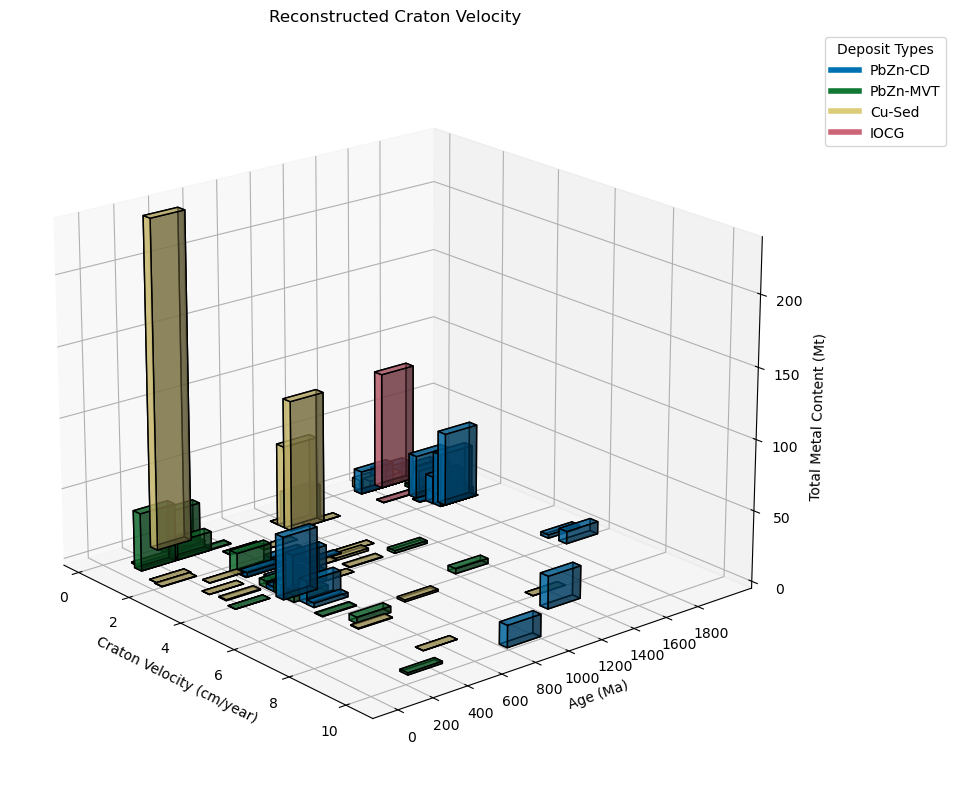

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Value = 'D_cr_ve'
# Load the dataset
file_path = './deposits_VS_random.csv'  # Replace with your file path
data = pd.read_csv(file_path, low_memory=False)

# Remove rows with NaN values in relevant columns
filtered_data = data.dropna(subset=[Value, 'Age', 'TM2', 'Type'])

# Define custom colors
custom_colors = ['#0072B2', '#117733', '#DDCC77', '#CC6677']

# Ensure the same bin size as in the previous chart
previous_min_val = 0  # Start from 0 as in the previous code
previous_max_val = filtered_data[Value].max()
num_bins = 40  # Same number of bins as in the previous code
bin_edges = np.linspace(previous_min_val, previous_max_val, num_bins)
x_bins = bin_edges  # Use the same binning approach
x_positions = (x_bins[:-1] + x_bins[1:]) / 2  # Bin centers

# Prepare Y-axis intervals with steps of 200
y_ticks = np.arange(0, filtered_data['Age'].max() + 200, 200)

# Create the 3D bar chart
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Adjust the view to 10 degrees from the Age axis
ax.view_init(elev=20, azim=-40)

# Map deposit types to custom colors
deposit_types = filtered_data['Type'].unique()
type_color_mapping = {deposit_type: custom_colors[i % len(custom_colors)] for i, deposit_type in enumerate(deposit_types)}

# Iterate through bins (X-axis: value) and ages (Y-axis) to plot bars (Z-axis: Weighted Number of Deposits)
for j, age in enumerate(filtered_data['Age'].unique()):
    for i in range(len(x_bins) - 1):
        subset = filtered_data[(filtered_data[Value] >= x_bins[i]) &
                               (filtered_data[Value] < x_bins[i + 1]) &
                               (filtered_data['Age'] == age)]
        if not subset.empty:
            weighted_count = subset['TM2'].sum()  # Sum of weights for the number of deposits
            deposit_type = subset['Type'].iloc[0]  # Get the deposit type for the subset
            ax.bar3d(
                x_positions[i], age, 0,  # X, Y, and starting Z positions
                x_bins[1] - x_bins[0], 200, weighted_count,  # Width, depth (200 interval), and height
                color=type_color_mapping[deposit_type],  # Use the mapped color
                edgecolor='k',  # Add black edges to bars
                alpha=0.6,  # Transparency for better visibility
                shade=True
            )

# Add legend
legend_handles = [
    plt.Line2D([0], [0], color=type_color_mapping[deposit_type], lw=4, label=deposit_type)
    for deposit_type in deposit_types
]
ax.legend(handles=legend_handles, title="Deposit Types", loc="upper left", bbox_to_anchor=(1.05, 1))

# Customize the chart
ax.set_xlabel('Craton Velocity (cm/year)')
ax.set_ylabel('Age (Ma)')
ax.set_zlabel('Total Metal Content (Mt)')
ax.set_yticks(y_ticks)
ax.set_yticklabels([int(y) for y in y_ticks])

# Title
ax.set_title('Reconstructed Craton Velocity')
plt.show()


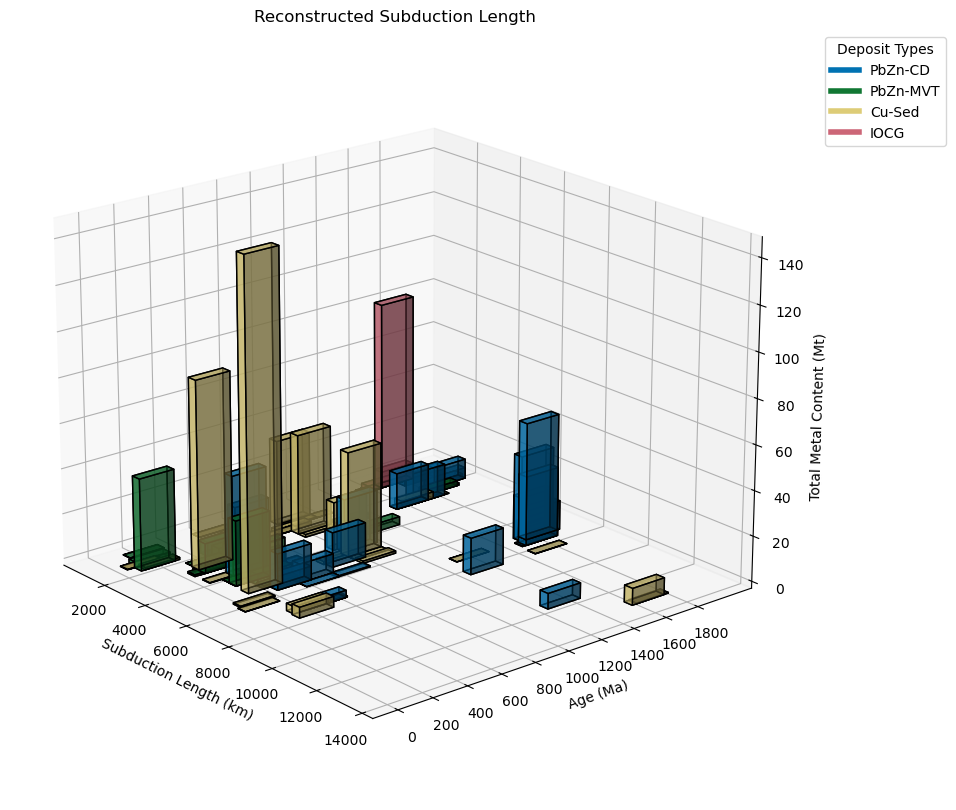

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Value = 'D_sub_len'
# Load the dataset
file_path = './deposits_VS_random.csv'  # Replace with your file path
data = pd.read_csv(file_path, low_memory=False)

# Remove rows with NaN values in relevant columns
filtered_data = data.dropna(subset=[Value, 'Age', 'TM2', 'Type'])

# Define custom colors
custom_colors = ['#0072B2', '#117733', '#DDCC77', '#CC6677']

# Ensure the same bin size as in the previous chart
previous_min_val = 0  # Start from 0 as in the previous code
previous_max_val = filtered_data[Value].max()
num_bins = 40  # Same number of bins as in the previous code
bin_edges = np.linspace(previous_min_val, previous_max_val, num_bins)
x_bins = bin_edges  # Use the same binning approach
x_positions = (x_bins[:-1] + x_bins[1:]) / 2  # Bin centers

# Prepare Y-axis intervals with steps of 200
y_ticks = np.arange(0, filtered_data['Age'].max() + 200, 200)

# Create the 3D bar chart
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Adjust the view to 10 degrees from the Age axis
ax.view_init(elev=20, azim=-40)

# Map deposit types to custom colors
deposit_types = filtered_data['Type'].unique()
type_color_mapping = {deposit_type: custom_colors[i % len(custom_colors)] for i, deposit_type in enumerate(deposit_types)}

# Iterate through bins (X-axis: value) and ages (Y-axis) to plot bars (Z-axis: Weighted Number of Deposits)
for j, age in enumerate(filtered_data['Age'].unique()):
    for i in range(len(x_bins) - 1):
        subset = filtered_data[(filtered_data[Value] >= x_bins[i]) &
                               (filtered_data[Value] < x_bins[i + 1]) &
                               (filtered_data['Age'] == age)]
        if not subset.empty:
            weighted_count = subset['TM2'].sum()  # Sum of weights for the number of deposits
            deposit_type = subset['Type'].iloc[0]  # Get the deposit type for the subset
            ax.bar3d(
                x_positions[i], age, 0,  # X, Y, and starting Z positions
                x_bins[1] - x_bins[0], 200, weighted_count,  # Width, depth (200 interval), and height
                color=type_color_mapping[deposit_type],  # Use the mapped color
                edgecolor='k',  # Add black edges to bars
                alpha=0.6,  # Transparency for better visibility
                shade=True
            )

# Add legend
legend_handles = [
    plt.Line2D([0], [0], color=type_color_mapping[deposit_type], lw=4, label=deposit_type)
    for deposit_type in deposit_types
]
ax.legend(handles=legend_handles, title="Deposit Types", loc="upper left", bbox_to_anchor=(1.05, 1))

# Customize the chart
ax.set_xlabel('Subduction Length (km)')
ax.set_ylabel('Age (Ma)')
ax.set_zlabel('Total Metal Content (Mt)')
ax.set_yticks(y_ticks)
ax.set_yticklabels([int(y) for y in y_ticks])

# Title
ax.set_title('Reconstructed Subduction Length')
plt.show()


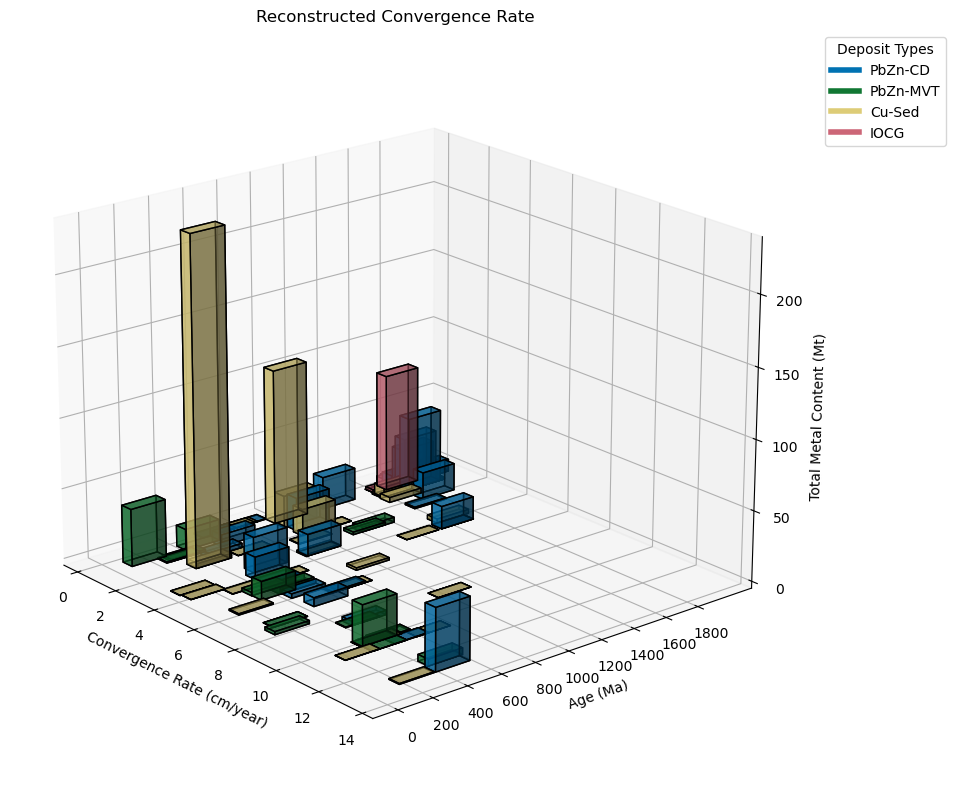

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Value = 'D_sb_ve'
# Load the dataset
file_path = './deposits_VS_random.csv'  # Replace with your file path
data = pd.read_csv(file_path, low_memory=False)

# Remove rows with NaN values in relevant columns
filtered_data = data.dropna(subset=[Value, 'Age', 'TM2', 'Type'])

# Define custom colors
custom_colors = ['#0072B2', '#117733', '#DDCC77', '#CC6677']

# Prepare binning for values (X-axis) starting from 0
min_val = 0  # Explicitly start from 0
max_val = filtered_data[Value].max()
bin_edges = np.linspace(min_val, max_val, 40)  # 40 bins for consistency
x_bins = bin_edges  # Use the updated binning approach
x_positions = (x_bins[:-1] + x_bins[1:]) / 2  # Bin centers

# Prepare Y-axis intervals with steps of 200
y_ticks = np.arange(0, filtered_data['Age'].max() + 200, 200)

# Create the 3D bar chart
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Adjust the view to 10 degrees from the Age axis
ax.view_init(elev=20, azim=-40)

# Map deposit types to custom colors
deposit_types = filtered_data['Type'].unique()
type_color_mapping = {deposit_type: custom_colors[i % len(custom_colors)] for i, deposit_type in enumerate(deposit_types)}

# Iterate through bins (X-axis: value) and ages (Y-axis) to plot bars (Z-axis: Weighted Number of Deposits)
for j, age in enumerate(filtered_data['Age'].unique()):
    for i in range(len(x_bins) - 1):
        subset = filtered_data[(filtered_data[Value] >= x_bins[i]) &
                               (filtered_data[Value] < x_bins[i + 1]) &
                               (filtered_data['Age'] == age)]
        if not subset.empty:
            weighted_count = subset['TM2'].sum()  # Sum of weights for the number of deposits
            deposit_type = subset['Type'].iloc[0]  # Get the deposit type for the subset
            ax.bar3d(
                x_positions[i], age, 0,  # X, Y, and starting Z positions
                x_bins[1] - x_bins[0], 200, weighted_count,  # Width, depth (200 interval), and height
                color=type_color_mapping[deposit_type],  # Use the mapped color
                edgecolor='k',  # Add black edges to bars
                alpha=0.6,  # Transparency for better visibility
                shade=True
            )

# Add legend
legend_handles = [
    plt.Line2D([0], [0], color=type_color_mapping[deposit_type], lw=4, label=deposit_type)
    for deposit_type in deposit_types
]
ax.legend(handles=legend_handles, title="Deposit Types", loc="upper left", bbox_to_anchor=(1.05, 1))

# Customize the chart
ax.set_xlabel('Convergence Rate (cm/year)')
ax.set_ylabel('Age (Ma)')
ax.set_zlabel('Total Metal Content (Mt)')
ax.set_yticks(y_ticks)
ax.set_yticklabels([int(y) for y in y_ticks])

# Title
ax.set_title('Reconstructed Convergence Rate')
plt.show()


# swap axes

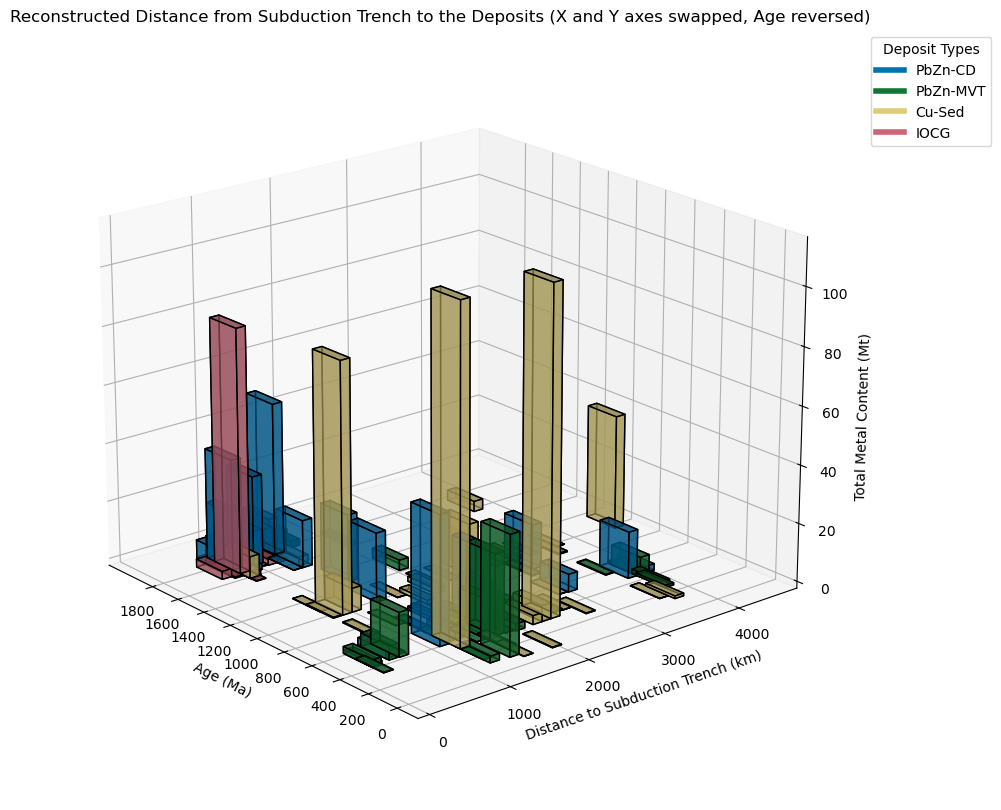

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
file_path = './deposits_VS_random.csv'  # Replace with your file path
data = pd.read_csv(file_path, low_memory=False)

# Remove rows with NaN values in relevant columns
filtered_data = data.dropna(subset=['D_ds_tr', 'Age', 'TM2', 'Type'])

# Define custom colors
custom_colors = ['#0072B2', '#117733', '#DDCC77', '#CC6677']

# Ensure the same bin size as in the previous charts
previous_min_val = 0  # Start from 0
previous_max_val = filtered_data['D_ds_tr'].max()
num_bins = 40  # Same number of bins as in the previous examples
bin_edges = np.linspace(previous_min_val, previous_max_val, num_bins)
y_bins = bin_edges  # Swapping to Y-axis
y_positions = (y_bins[:-1] + y_bins[1:]) / 2  # Bin centers

# Prepare X-axis intervals with steps of 200 for Age
x_ticks = np.arange(0, filtered_data['Age'].max() + 200, 200)

# Create the 3D bar chart
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Adjust the view angle
ax.view_init(elev=20, azim=-40)

# Map deposit types to custom colors
deposit_types = filtered_data['Type'].unique()
type_color_mapping = {deposit_type: custom_colors[i % len(custom_colors)] for i, deposit_type in enumerate(deposit_types)}

# Iterate through ages (X-axis now) and distances (Y-axis) to plot bars
for j, age in enumerate(filtered_data['Age'].unique()):
    for i in range(len(y_bins) - 1):
        subset = filtered_data[(filtered_data['D_ds_tr'] >= y_bins[i]) &
                               (filtered_data['D_ds_tr'] < y_bins[i + 1]) &
                               (filtered_data['Age'] == age)]
        if not subset.empty:
            weighted_count = subset['TM2'].sum()  # Sum of weights for the number of deposits
            deposit_type = subset['Type'].iloc[0]  # Get the deposit type for the subset
            ax.bar3d(
                age, y_positions[i], 0,  # Swapped X (Age) and Y (Distance)
                200, y_bins[1] - y_bins[0], weighted_count,  # Width (Age), Depth (Distance), Height
                color=type_color_mapping[deposit_type],  # Mapped color
                edgecolor='k',  # Add black edges to bars
                alpha=0.6,  # Transparency
                shade=True
            )

# Add legend
legend_handles = [
    plt.Line2D([0], [0], color=type_color_mapping[deposit_type], lw=4, label=deposit_type)
    for deposit_type in deposit_types
]
ax.legend(handles=legend_handles, title="Deposit Types", loc="upper left", bbox_to_anchor=(1.05, 1))

# Customize the chart with swapped axes
ax.set_xlabel('Age (Ma)')
ax.set_ylabel('Distance to Subduction Trench (km)')
ax.set_zlabel('Total Metal Content (Mt)')
ax.set_xticks(x_ticks)
ax.set_xticklabels([int(x) for x in x_ticks])

# Invert Age axis to start 0 from the other side
ax.invert_xaxis()

# Title
ax.set_title('Reconstructed Distance from Subduction Trench to the Deposits (X and Y axes swapped, Age reversed)')
plt.show()


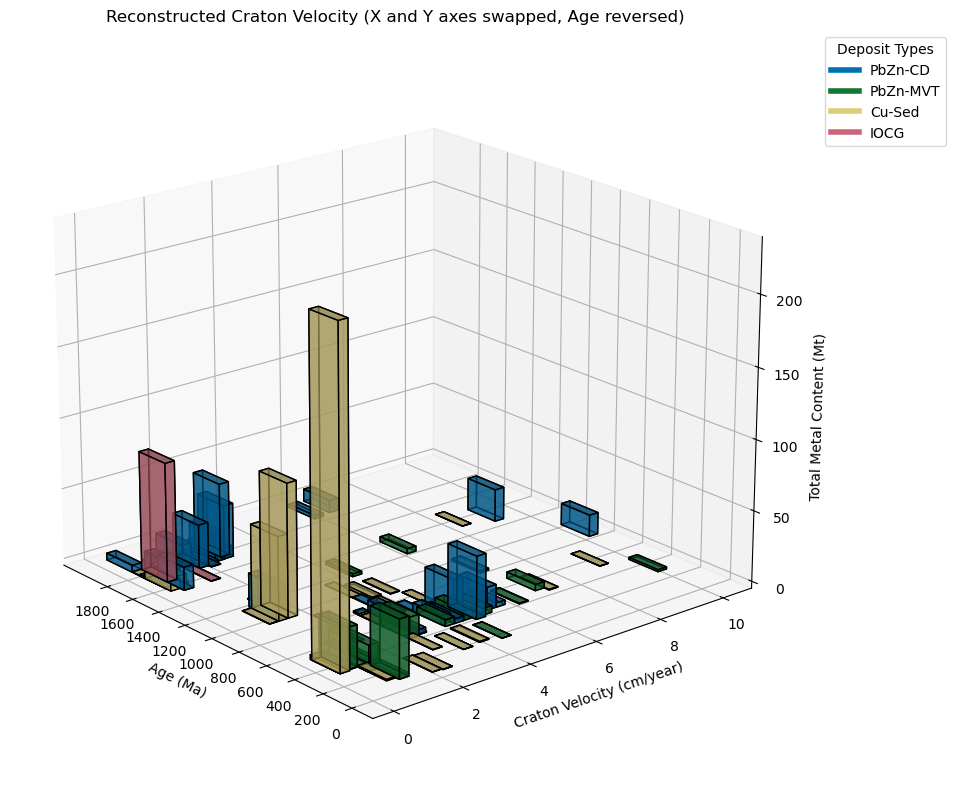

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Value = 'D_cr_ve'
# Load the dataset
file_path = './deposits_VS_random.csv'  # Replace with your file path
data = pd.read_csv(file_path, low_memory=False)

# Remove rows with NaN values in relevant columns
filtered_data = data.dropna(subset=[Value, 'Age', 'TM2', 'Type'])

# Define custom colors
custom_colors = ['#0072B2', '#117733', '#DDCC77', '#CC6677']

# Ensure the same bin size as in the previous chart
previous_min_val = 0  # Start from 0
previous_max_val = filtered_data[Value].max()
num_bins = 40  # Number of bins
bin_edges = np.linspace(previous_min_val, previous_max_val, num_bins)
y_bins = bin_edges  # Swapped to Y-axis
y_positions = (y_bins[:-1] + y_bins[1:]) / 2  # Bin centers

# Prepare X-axis intervals with steps of 200 for Age
x_ticks = np.arange(0, filtered_data['Age'].max() + 200, 200)

# Create the 3D bar chart
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Adjust the view angle
ax.view_init(elev=20, azim=-40)

# Map deposit types to custom colors
deposit_types = filtered_data['Type'].unique()
type_color_mapping = {deposit_type: custom_colors[i % len(custom_colors)] for i, deposit_type in enumerate(deposit_types)}

# Iterate through ages (X-axis now) and craton velocities (Y-axis) to plot bars
for j, age in enumerate(filtered_data['Age'].unique()):
    for i in range(len(y_bins) - 1):
        subset = filtered_data[(filtered_data[Value] >= y_bins[i]) &
                               (filtered_data[Value] < y_bins[i + 1]) &
                               (filtered_data['Age'] == age)]
        if not subset.empty:
            weighted_count = subset['TM2'].sum()  # Sum of weights for the number of deposits
            deposit_type = subset['Type'].iloc[0]  # Get the deposit type for the subset
            ax.bar3d(
                age, y_positions[i], 0,  # Swapped X (Age) and Y (Craton Velocity)
                200, y_bins[1] - y_bins[0], weighted_count,  # Width (Age), Depth (Craton Velocity), Height
                color=type_color_mapping[deposit_type],  # Mapped color
                edgecolor='k',  # Add black edges to bars
                alpha=0.6,  # Transparency
                shade=True
            )

# Add legend
legend_handles = [
    plt.Line2D([0], [0], color=type_color_mapping[deposit_type], lw=4, label=deposit_type)
    for deposit_type in deposit_types
]
ax.legend(handles=legend_handles, title="Deposit Types", loc="upper left", bbox_to_anchor=(1.05, 1))

# Customize the chart with swapped axes
ax.set_xlabel('Age (Ma)')
ax.set_ylabel('Craton Velocity (cm/year)')
ax.set_zlabel('Total Metal Content (Mt)')
ax.set_xticks(x_ticks)
ax.set_xticklabels([int(x) for x in x_ticks])

# Invert Age axis to start 0 from the other side
ax.invert_xaxis()

# Title
ax.set_title('Reconstructed Craton Velocity (X and Y axes swapped, Age reversed)')
plt.show()


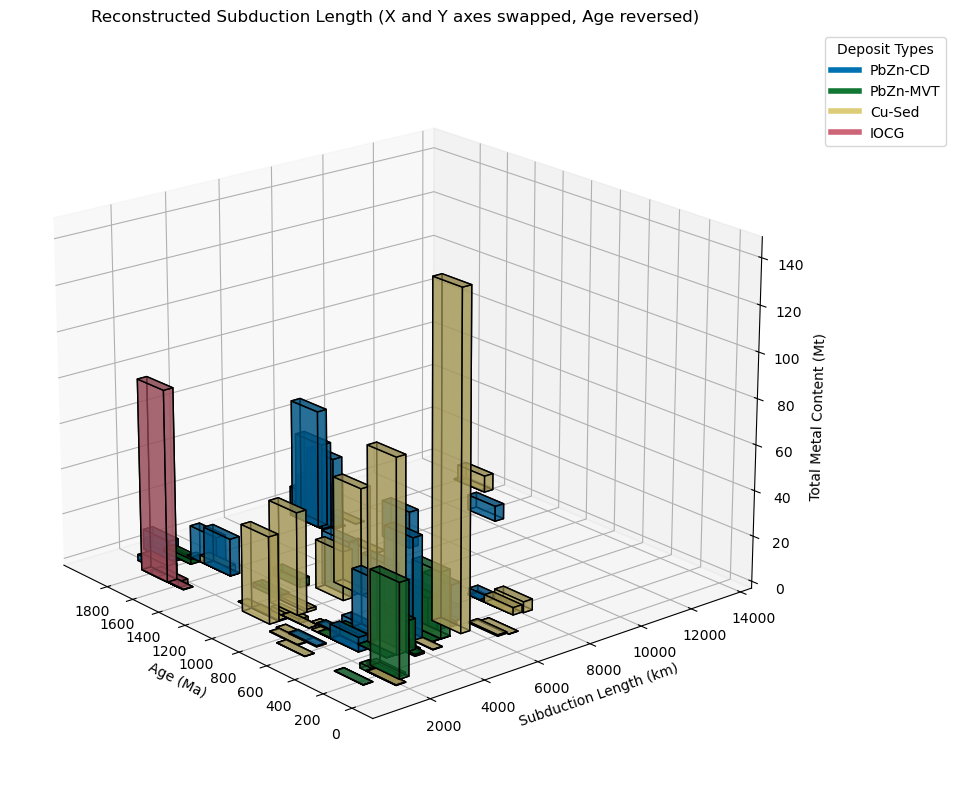

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Value = 'D_sub_len'
# Load the dataset
file_path = './deposits_VS_random.csv'  # Replace with your file path
data = pd.read_csv(file_path, low_memory=False)

# Remove rows with NaN values in relevant columns
filtered_data = data.dropna(subset=[Value, 'Age', 'TM2', 'Type'])

# Define custom colors
custom_colors = ['#0072B2', '#117733', '#DDCC77', '#CC6677']

# Ensure the same bin size as in the previous chart
previous_min_val = 0  # Start from 0
previous_max_val = filtered_data[Value].max()
num_bins = 40  # Number of bins
bin_edges = np.linspace(previous_min_val, previous_max_val, num_bins)
y_bins = bin_edges  # Swapped to Y-axis
y_positions = (y_bins[:-1] + y_bins[1:]) / 2  # Bin centers

# Prepare X-axis intervals with steps of 200 for Age
x_ticks = np.arange(0, filtered_data['Age'].max() + 200, 200)

# Create the 3D bar chart
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Adjust the view angle
ax.view_init(elev=20, azim=-40)

# Map deposit types to custom colors
deposit_types = filtered_data['Type'].unique()
type_color_mapping = {deposit_type: custom_colors[i % len(custom_colors)] for i, deposit_type in enumerate(deposit_types)}

# Iterate through ages (X-axis now) and subduction lengths (Y-axis) to plot bars
for j, age in enumerate(filtered_data['Age'].unique()):
    for i in range(len(y_bins) - 1):
        subset = filtered_data[(filtered_data[Value] >= y_bins[i]) &
                               (filtered_data[Value] < y_bins[i + 1]) &
                               (filtered_data['Age'] == age)]
        if not subset.empty:
            weighted_count = subset['TM2'].sum()  # Sum of weights for the number of deposits
            deposit_type = subset['Type'].iloc[0]  # Get the deposit type for the subset
            ax.bar3d(
                age, y_positions[i], 0,  # Swapped X (Age) and Y (Subduction Length)
                200, y_bins[1] - y_bins[0], weighted_count,  # Width (Age), Depth (Subduction), Height
                color=type_color_mapping[deposit_type],  # Mapped color
                edgecolor='k',  # Add black edges to bars
                alpha=0.6,  # Transparency
                shade=True
            )

# Add legend
legend_handles = [
    plt.Line2D([0], [0], color=type_color_mapping[deposit_type], lw=4, label=deposit_type)
    for deposit_type in deposit_types
]
ax.legend(handles=legend_handles, title="Deposit Types", loc="upper left", bbox_to_anchor=(1.05, 1))

# Customize the chart with swapped axes
ax.set_xlabel('Age (Ma)')
ax.set_ylabel('Subduction Length (km)')
ax.set_zlabel('Total Metal Content (Mt)')
ax.set_xticks(x_ticks)
ax.set_xticklabels([int(x) for x in x_ticks])

# Invert Age axis to start 0 from the other side
ax.invert_xaxis()

# Title
ax.set_title('Reconstructed Subduction Length (X and Y axes swapped, Age reversed)')
plt.show()


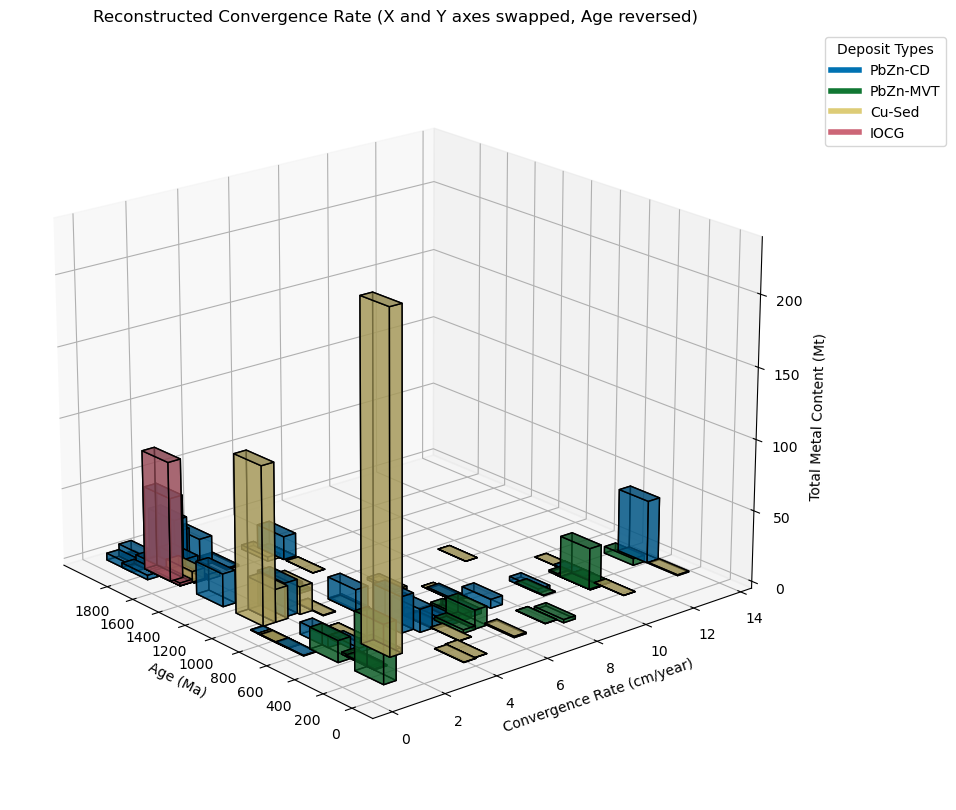

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Value = 'D_sb_ve'
# Load the dataset
file_path = './deposits_VS_random.csv'  # Replace with your file path
data = pd.read_csv(file_path, low_memory=False)

# Remove rows with NaN values in relevant columns
filtered_data = data.dropna(subset=[Value, 'Age', 'TM2', 'Type'])

# Define custom colors
custom_colors = ['#0072B2', '#117733', '#DDCC77', '#CC6677']

# Prepare binning for values (Y-axis now)
min_val = 0  # Explicitly start from 0
max_val = filtered_data[Value].max()
bin_edges = np.linspace(min_val, max_val, 40)  # 40 bins for consistency
y_bins = bin_edges  # Use the updated binning approach
y_positions = (y_bins[:-1] + y_bins[1:]) / 2  # Bin centers

# Prepare X-axis intervals with steps of 200 for Age
x_ticks = np.arange(0, filtered_data['Age'].max() + 200, 200)

# Create the 3D bar chart
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Adjust the view to 10 degrees from the new Age axis
ax.view_init(elev=20, azim=-40)

# Map deposit types to custom colors
deposit_types = filtered_data['Type'].unique()
type_color_mapping = {deposit_type: custom_colors[i % len(custom_colors)] for i, deposit_type in enumerate(deposit_types)}

# Iterate through ages (X-axis now) and bins (Y-axis) to plot bars (Z-axis: Weighted Number of Deposits)
for j, age in enumerate(filtered_data['Age'].unique()):
    for i in range(len(y_bins) - 1):
        subset = filtered_data[(filtered_data[Value] >= y_bins[i]) &
                               (filtered_data[Value] < y_bins[i + 1]) &
                               (filtered_data['Age'] == age)]
        if not subset.empty:
            weighted_count = subset['TM2'].sum()  # Sum of weights for the number of deposits
            deposit_type = subset['Type'].iloc[0]  # Get the deposit type for the subset
            ax.bar3d(
                age, y_positions[i], 0,  # Swapped X (age) and Y (value) positions
                200, y_bins[1] - y_bins[0], weighted_count,  # Width (age), depth (value), and height
                color=type_color_mapping[deposit_type],  # Use the mapped color
                edgecolor='k',  # Add black edges to bars
                alpha=0.6,  # Transparency for better visibility
                shade=True
            )

# Add legend
legend_handles = [
    plt.Line2D([0], [0], color=type_color_mapping[deposit_type], lw=4, label=deposit_type)
    for deposit_type in deposit_types
]
ax.legend(handles=legend_handles, title="Deposit Types", loc="upper left", bbox_to_anchor=(1.05, 1))

# Customize the chart with swapped axis labels
ax.set_xlabel('Age (Ma)')
ax.set_ylabel('Convergence Rate (cm/year)')
ax.set_zlabel('Total Metal Content (Mt)')
ax.set_xticks(x_ticks)
ax.set_xticklabels([int(x) for x in x_ticks])

# Invert Age axis to start 0 from the other side
ax.invert_xaxis()

# Title
ax.set_title('Reconstructed Convergence Rate (X and Y axes swapped, Age reversed)')
plt.show()


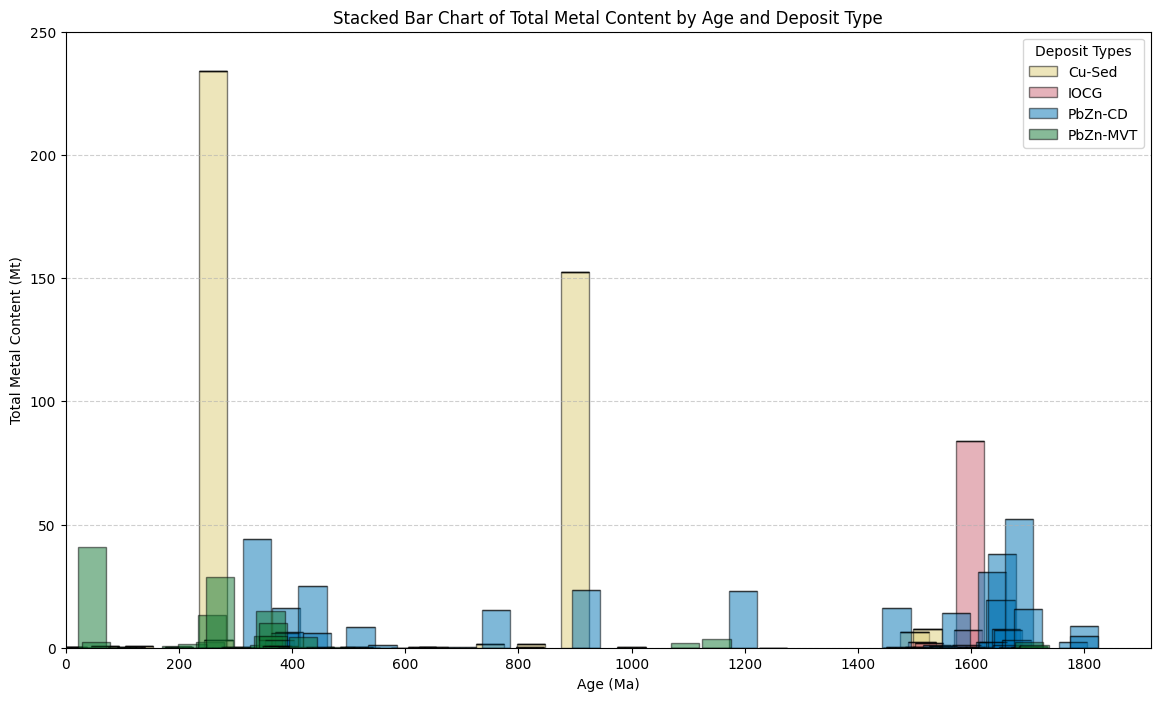

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your CSV file into a DataFrame
file_path = 'deposits_VS_random.csv'  # Update with your file path
df = pd.read_csv(file_path, low_memory=False)

# Define colors based on deposit type
type_colors = {
    'PbZn-CD': '#0072B2',  # Blue
    'PbZn-MVT': '#117733',  # Green
    'Cu-Sed': '#DDCC77',    # Yellow
    'IOCG': '#CC6677'       # Pink
}

# Replace NaN values in 'Type' with 'Unknown'
df['Type'] = df['Type'].fillna('Unknown')

# Remove NaN values in relevant columns
df = df.dropna(subset=['Age', 'TM2', 'Type'])

# Group data by Age and Type, summing the Total Metal Content
grouped_data = df.groupby(['Age', 'Type'])['TM2'].sum().unstack(fill_value=0)

# Sort by Age (to start from 0 Ma on the left)
grouped_data = grouped_data.sort_index()

# Create the stacked bar chart
fig, ax = plt.subplots(figsize=(14, 8))

# X positions for bars (Age values)
x_positions = grouped_data.index

# Initialize the bottom array for stacking
bottom_values = np.zeros(len(grouped_data))

# Plot each deposit type as a stacked bar with transparency
for i, deposit_type in enumerate(grouped_data.columns):
    color = type_colors.get(deposit_type, 'gray')
    ax.bar(
        x_positions, grouped_data[deposit_type], 
        bottom=bottom_values, color=color, label=deposit_type, 
        edgecolor='black', width=50, alpha=0.5  # Added transparency (alpha=0.5)
    )
    bottom_values += grouped_data[deposit_type]  # Stack on top

# Customize X-axis ticks (Age) with intervals of 200 Ma and remove decimals
x_ticks = np.arange(0, grouped_data.index.max() + 200, 200)
ax.set_xticks(x_ticks)
ax.set_xticklabels([int(tick) for tick in x_ticks])  # No decimals

# Customize Y-axis ticks (Total Metal Content) with intervals of 50 Mt and remove decimals
y_max = bottom_values.max()
y_ticks = np.arange(0, y_max + 50, 50)
ax.set_yticks(y_ticks)
ax.set_yticklabels([int(tick) for tick in y_ticks])  # No decimals

# Customize plot
ax.set_xlabel('Age (Ma)')
ax.set_ylabel('Total Metal Content (Mt)')
ax.set_title('Stacked Bar Chart of Total Metal Content by Age and Deposit Type')
ax.legend(title='Deposit Types')
ax.grid(axis='y', linestyle='--', alpha=0.6)

# X-axis starts at 0 and increases (0 on the left)
ax.set_xlim(left=0)

plt.show()


# Density for Rnadom

C:\Users\Hojat\AppData\Local\Temp\ipykernel_14432\688617240.py:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


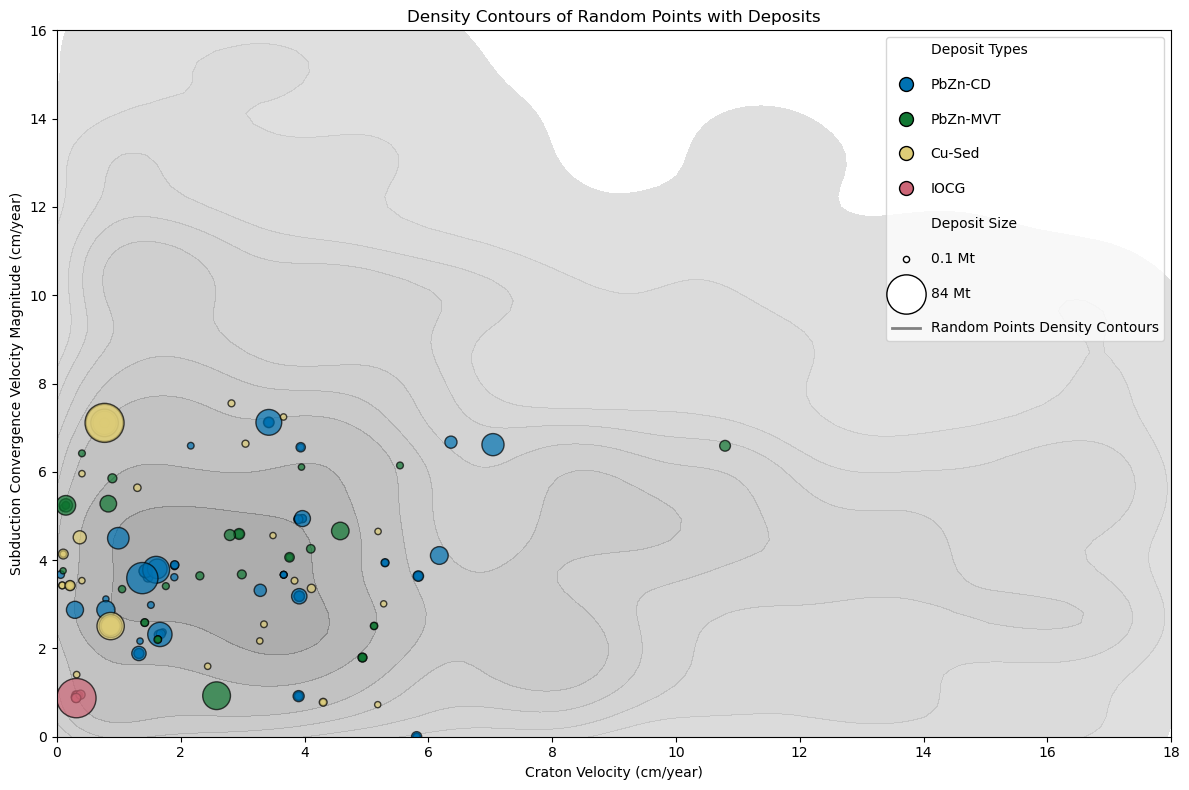

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import gaussian_kde

# Load your CSV file into a DataFrame
file_path = 'deposits_VS_random.csv'  # Update with your file path
df = pd.read_csv(file_path)

# Define columns for deposit and random data
x_deposit = 'D_cr_ve_m'
y_deposit = 'D_sb_ve_m'
x_random = 'R_cr_ve_m'
y_random = 'R_sb_ve_m'
weights_column = 'TM2'

# Select data without filtering NaN
deposit_data = df[[x_deposit, y_deposit, weights_column, 'Type']]
random_data = df[[x_random, y_random]]

# Remove negative values
deposit_data = deposit_data[(deposit_data[x_deposit] >= 0) & (deposit_data[y_deposit] >= 0)]
random_data = random_data[(random_data[x_random] >= 0) & (random_data[y_random] >= 0)]

# Extract data and weights
x_deposit_values = deposit_data[x_deposit]
y_deposit_values = deposit_data[y_deposit]
deposit_weights = deposit_data[weights_column]
deposit_types = deposit_data['Type']

x_random_values = random_data[x_random]
y_random_values = random_data[y_random]

# Define colors based on deposit type
type_colors = {
    'PbZn-CD': '#0072B2',  # Blue
    'PbZn-MVT': '#117733',  # Green
    'Cu-Sed': '#DDCC77',  # Yellow
    'IOCG': '#CC6677',  # Pink
    'Unknown': 'gray'  # For any NaN or unknown types
}

# Map TM2 to size using a continuous scale
min_size, max_size = 20, 800  # Minimum and maximum sizes for scaling
scaled_sizes = (deposit_weights - deposit_weights.min()) / (deposit_weights.max() - deposit_weights.min())
scaled_sizes = scaled_sizes * (max_size - min_size) + min_size

# Create density contours for random points
plt.figure(figsize=(12, 8))

# Plot filled gray contour for random points
sns.kdeplot(x=x_random_values, y=y_random_values, color='gray', fill=True, alpha=0.5, levels=10)

# Scatter plot for deposits with continuous scaling, colored by type
for deposit_type in deposit_types.unique():
    if pd.isna(deposit_type) or deposit_type == 'Unknown':
        continue
    type_data = deposit_data[deposit_data['Type'] == deposit_type]
    plt.scatter(type_data[x_deposit], type_data[y_deposit],
                s=scaled_sizes[type_data.index],
                color=type_colors.get(deposit_type, 'gray'),
                edgecolor='black',
                alpha=0.7, label=f'{deposit_type}', marker='o')

# Add placeholders for Deposit Types and Deposit Size
legend_elements = []
legend_elements.append(plt.Line2D([0], [0], label='Deposit Types', color='none'))
for deposit_type, color in type_colors.items():
    if deposit_type != 'Unknown':
        legend_elements.append(plt.Line2D([0], [0], marker='o', color=color, label=deposit_type, markersize=10, 
                                          markeredgecolor='black', linestyle='None'))

legend_elements.append(plt.Line2D([0], [0], label='Deposit Size', color='none'))
legend_elements.append(plt.scatter([], [], s=min_size, color='white', alpha=1, edgecolor='black', label='0.1 Mt', marker='o'))
legend_elements.append(plt.scatter([], [], s=max_size, color='white', alpha=1, edgecolor='black', label='84 Mt', marker='o'))

# Add legend entry for random point density contours
legend_elements.append(plt.Line2D([0], [0], color='gray', linewidth=2, label='Random Points Density Contours'))

# Set axis limits between 0 and 18
plt.xlim([0, 18])
plt.ylim([0, 16])

# Labels and legend
plt.xlabel('Craton Velocity (cm/year)')
plt.ylabel('Subduction Convergence Velocity Magnitude (cm/year)')
plt.legend(handles=legend_elements, loc='upper right', frameon=True, labelspacing=1.5)

plt.title('Density Contours of Random Points with Deposits')
plt.tight_layout()
plt.show()


C:\Users\Hojat\AppData\Local\Temp\ipykernel_14432\2320492655.py:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


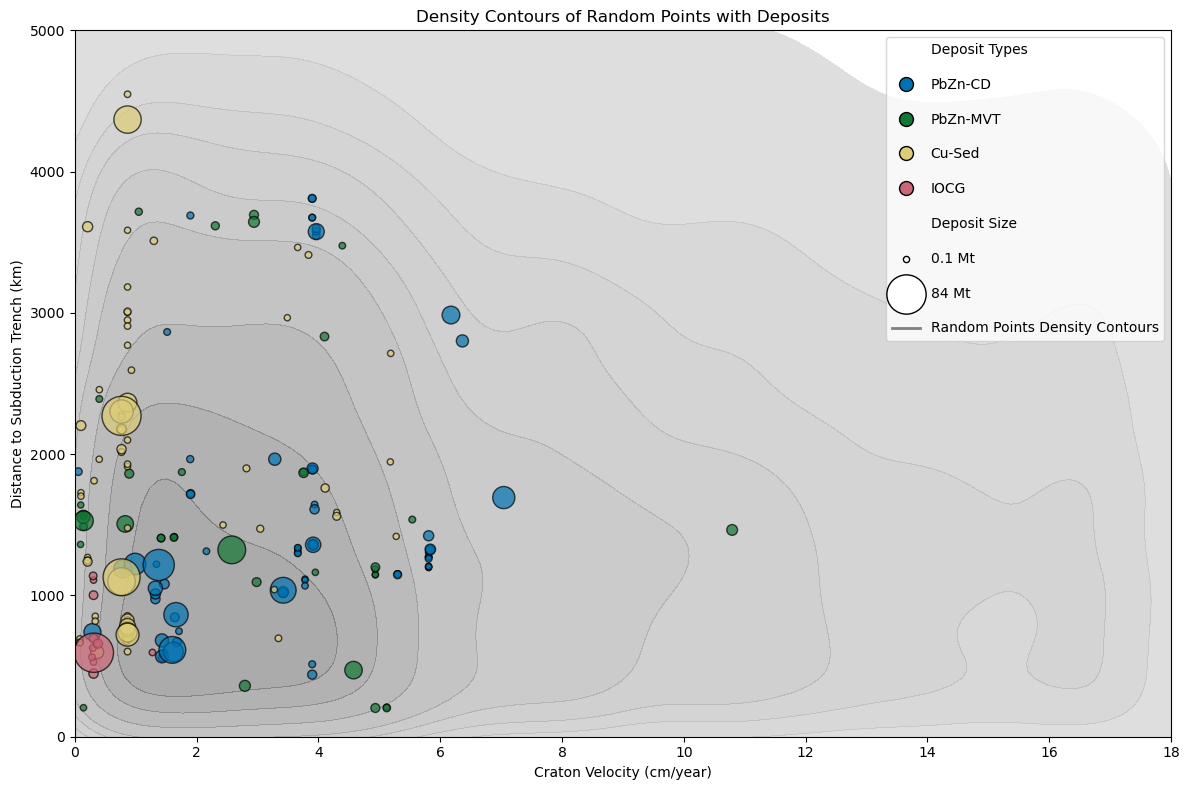

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import gaussian_kde

# Load your CSV file into a DataFrame
file_path = 'deposits_VS_random.csv'  # Update with your file path
df = pd.read_csv(file_path)

# Define columns for deposit and random data
x_deposit = 'D_cr_ve_m'
y_deposit = 'D_ds_tr'
x_random = 'R_cr_ve_m'
y_random = 'R_ds_tr'
weights_column = 'TM2'

# Select data without filtering NaN
deposit_data = df[[x_deposit, y_deposit, weights_column, 'Type']]
random_data = df[[x_random, y_random]]

# Remove negative values
deposit_data = deposit_data[(deposit_data[x_deposit] >= 0) & (deposit_data[y_deposit] >= 0)]
random_data = random_data[(random_data[x_random] >= 0) & (random_data[y_random] >= 0)]

# Extract data and weights
x_deposit_values = deposit_data[x_deposit]
y_deposit_values = deposit_data[y_deposit]
deposit_weights = deposit_data[weights_column]
deposit_types = deposit_data['Type']

x_random_values = random_data[x_random]
y_random_values = random_data[y_random]

# Define colors based on deposit type
type_colors = {
    'PbZn-CD': '#0072B2',  # Blue
    'PbZn-MVT': '#117733',  # Green
    'Cu-Sed': '#DDCC77',  # Yellow
    'IOCG': '#CC6677',  # Pink
    'Unknown': 'gray'  # For any NaN or unknown types
}

# Map TM2 to size using a continuous scale
min_size, max_size = 20, 800  # Minimum and maximum sizes for scaling
scaled_sizes = (deposit_weights - deposit_weights.min()) / (deposit_weights.max() - deposit_weights.min())
scaled_sizes = scaled_sizes * (max_size - min_size) + min_size

# Create density contours for random points
plt.figure(figsize=(12, 8))

# Plot filled gray contour for random points
sns.kdeplot(x=x_random_values, y=y_random_values, color='gray', fill=True, alpha=0.5, levels=10)

# Scatter plot for deposits with continuous scaling, colored by type
for deposit_type in deposit_types.unique():
    if pd.isna(deposit_type) or deposit_type == 'Unknown':
        continue
    type_data = deposit_data[deposit_data['Type'] == deposit_type]
    plt.scatter(type_data[x_deposit], type_data[y_deposit],
                s=scaled_sizes[type_data.index],
                color=type_colors.get(deposit_type, 'gray'),
                edgecolor='black',
                alpha=0.7, label=f'{deposit_type}', marker='o')

# Add placeholders for Deposit Types and Deposit Size
legend_elements = []
legend_elements.append(plt.Line2D([0], [0], label='Deposit Types', color='none'))
for deposit_type, color in type_colors.items():
    if deposit_type != 'Unknown':
        legend_elements.append(plt.Line2D([0], [0], marker='o', color=color, label=deposit_type, markersize=10, 
                                          markeredgecolor='black', linestyle='None'))

legend_elements.append(plt.Line2D([0], [0], label='Deposit Size', color='none'))
legend_elements.append(plt.scatter([], [], s=min_size, color='white', alpha=1, edgecolor='black', label='0.1 Mt', marker='o'))
legend_elements.append(plt.scatter([], [], s=max_size, color='white', alpha=1, edgecolor='black', label='84 Mt', marker='o'))

# Add legend entry for random point density contours
legend_elements.append(plt.Line2D([0], [0], color='gray', linewidth=2, label='Random Points Density Contours'))

# Set axis limits between 0 and 18
plt.xlim([0, 18])
plt.ylim([0, 5000])

# Labels and legend
plt.xlabel('Craton Velocity (cm/year)')
plt.ylabel('Distance to Subduction Trench (km)')
plt.legend(handles=legend_elements, loc='upper right', frameon=True, labelspacing=1.5)

plt.title('Density Contours of Random Points with Deposits')
plt.tight_layout()
plt.show()


C:\Users\Hojat\AppData\Local\Temp\ipykernel_14432\2867852741.py:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


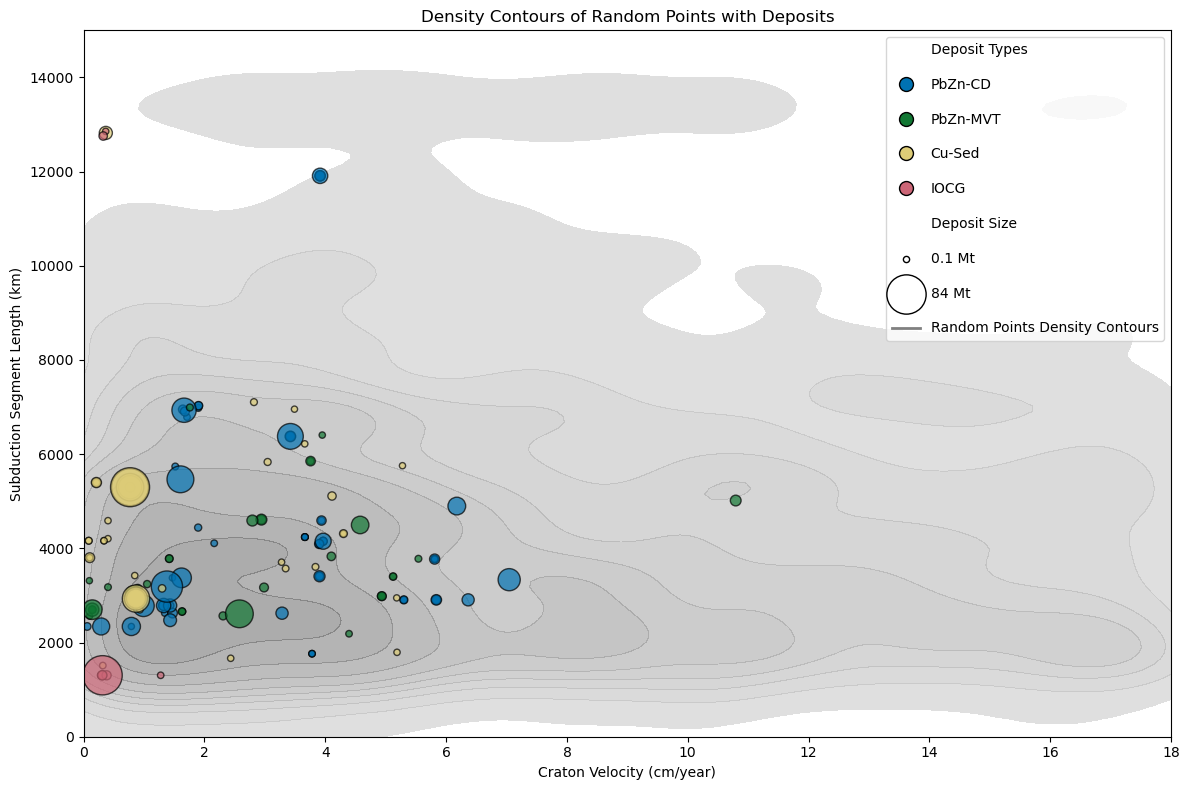

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import gaussian_kde

# Load your CSV file into a DataFrame
file_path = 'deposits_VS_random.csv'  # Update with your file path
df = pd.read_csv(file_path)

# Define columns for deposit and random data
x_deposit = 'D_cr_ve_m'
y_deposit = 'D_sub_len_m'
x_random = 'R_cr_ve_m'
y_random = 'R_sub_len_m'
weights_column = 'TM2'

# Select data without filtering NaN
deposit_data = df[[x_deposit, y_deposit, weights_column, 'Type']]
random_data = df[[x_random, y_random]]

# Remove negative values
deposit_data = deposit_data[(deposit_data[x_deposit] >= 0) & (deposit_data[y_deposit] >= 0)]
random_data = random_data[(random_data[x_random] >= 0) & (random_data[y_random] >= 0)]

# Extract data and weights
x_deposit_values = deposit_data[x_deposit]
y_deposit_values = deposit_data[y_deposit]
deposit_weights = deposit_data[weights_column]
deposit_types = deposit_data['Type']

x_random_values = random_data[x_random]
y_random_values = random_data[y_random]

# Define colors based on deposit type
type_colors = {
    'PbZn-CD': '#0072B2',  # Blue
    'PbZn-MVT': '#117733',  # Green
    'Cu-Sed': '#DDCC77',  # Yellow
    'IOCG': '#CC6677',  # Pink
    'Unknown': 'gray'  # For any NaN or unknown types
}

# Map TM2 to size using a continuous scale
min_size, max_size = 20, 800  # Minimum and maximum sizes for scaling
scaled_sizes = (deposit_weights - deposit_weights.min()) / (deposit_weights.max() - deposit_weights.min())
scaled_sizes = scaled_sizes * (max_size - min_size) + min_size

# Create density contours for random points
plt.figure(figsize=(12, 8))

# Plot filled gray contour for random points
sns.kdeplot(x=x_random_values, y=y_random_values, color='gray', fill=True, alpha=0.5, levels=10)

# Scatter plot for deposits with continuous scaling, colored by type
for deposit_type in deposit_types.unique():
    if pd.isna(deposit_type) or deposit_type == 'Unknown':
        continue
    type_data = deposit_data[deposit_data['Type'] == deposit_type]
    plt.scatter(type_data[x_deposit], type_data[y_deposit],
                s=scaled_sizes[type_data.index],
                color=type_colors.get(deposit_type, 'gray'),
                edgecolor='black',
                alpha=0.7, label=f'{deposit_type}', marker='o')

# Add placeholders for Deposit Types and Deposit Size
legend_elements = []
legend_elements.append(plt.Line2D([0], [0], label='Deposit Types', color='none'))
for deposit_type, color in type_colors.items():
    if deposit_type != 'Unknown':
        legend_elements.append(plt.Line2D([0], [0], marker='o', color=color, label=deposit_type, markersize=10, 
                                          markeredgecolor='black', linestyle='None'))

legend_elements.append(plt.Line2D([0], [0], label='Deposit Size', color='none'))
legend_elements.append(plt.scatter([], [], s=min_size, color='white', alpha=1, edgecolor='black', label='0.1 Mt', marker='o'))
legend_elements.append(plt.scatter([], [], s=max_size, color='white', alpha=1, edgecolor='black', label='84 Mt', marker='o'))

# Add legend entry for random point density contours
legend_elements.append(plt.Line2D([0], [0], color='gray', linewidth=2, label='Random Points Density Contours'))

# Set axis limits between 0 and 18
plt.xlim([0, 18])
plt.ylim([0, 15000])

# Labels and legend
plt.xlabel('Craton Velocity (cm/year)')
plt.ylabel('Subduction Segment Length (km)')
plt.legend(handles=legend_elements, loc='upper right', frameon=True, labelspacing=1.5)

plt.title('Density Contours of Random Points with Deposits')
plt.tight_layout()
plt.show()

# Modified

C:\Users\Hojat\AppData\Local\Temp\ipykernel_14432\4202128902.py:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


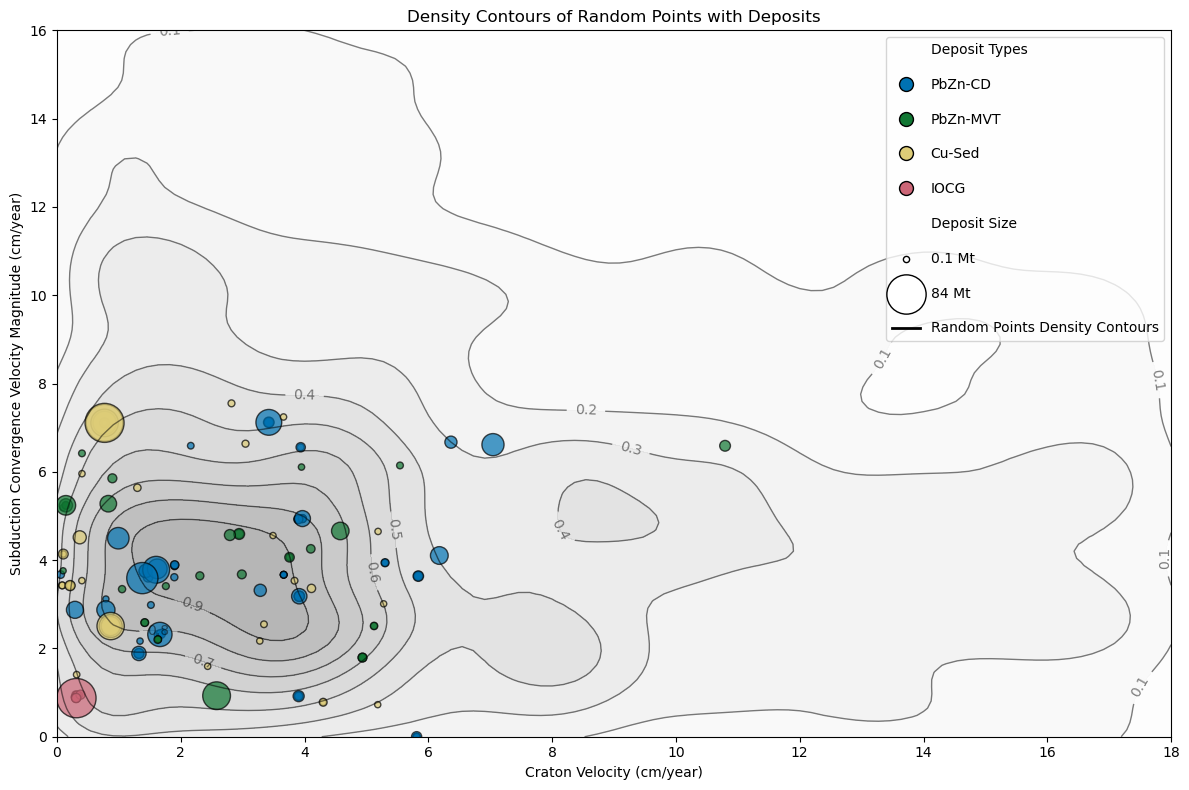

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import gaussian_kde

# Load your CSV file into a DataFrame
file_path = 'deposits_VS_random.csv'  # Update with your file path
df = pd.read_csv(file_path)

# Define columns for deposit and random data
x_deposit = 'D_cr_ve_m'
y_deposit = 'D_sb_ve_m'
x_random = 'R_cr_ve_m'
y_random = 'R_sb_ve_m'
weights_column = 'TM2'

# Select data without filtering NaN
deposit_data = df[[x_deposit, y_deposit, weights_column, 'Type']]
random_data = df[[x_random, y_random]]

# Remove negative values
deposit_data = deposit_data[(deposit_data[x_deposit] >= 0) & (deposit_data[y_deposit] >= 0)]
random_data = random_data[(random_data[x_random] >= 0) & (random_data[y_random] >= 0)]

# Extract data and weights
x_deposit_values = deposit_data[x_deposit]
y_deposit_values = deposit_data[y_deposit]
deposit_weights = deposit_data[weights_column]
deposit_types = deposit_data['Type']

x_random_values = random_data[x_random]
y_random_values = random_data[y_random]

# Define colors based on deposit type
type_colors = {
    'PbZn-CD': '#0072B2',  # Blue
    'PbZn-MVT': '#117733',  # Green
    'Cu-Sed': '#DDCC77',  # Yellow
    'IOCG': '#CC6677',  # Pink
    'Unknown': 'gray'  # For any NaN or unknown types
}

# Map TM2 to size using a continuous scale
min_size, max_size = 20, 800  # Minimum and maximum sizes for scaling
scaled_sizes = (deposit_weights - deposit_weights.min()) / (deposit_weights.max() - deposit_weights.min())
scaled_sizes = scaled_sizes * (max_size - min_size) + min_size

# Compute density contours for random points
xmin, xmax = 0, 18
ymin, ymax = 0, 16
xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))

# Compute KDE for random points
values = np.vstack([x_random_values, y_random_values])
kde = gaussian_kde(values)
density = kde(np.vstack([xx.ravel(), yy.ravel()])).reshape(xx.shape)

# Normalize density values to range between 0 and 1
density_normalized = density / density.max()

# Create plot
plt.figure(figsize=(12, 8))

# Plot filled gray contour for random points
contour = plt.contourf(xx, yy, density_normalized, levels=10, cmap='Greys', alpha=0.3)
cset = plt.contour(xx, yy, density_normalized, levels=10, colors='black', linewidths=1, alpha=0.5)

# Ensure labels are meaningful (between 0 and 1)
plt.clabel(cset, inline=True, fontsize=10, fmt="%.1f")  # Labels with 3 decimal places

# Scatter plot for deposits with continuous scaling, colored by type
for deposit_type in deposit_types.unique():
    if pd.isna(deposit_type) or deposit_type == 'Unknown':
        continue
    type_data = deposit_data[deposit_data['Type'] == deposit_type]
    plt.scatter(type_data[x_deposit], type_data[y_deposit],
                s=scaled_sizes[type_data.index],
                color=type_colors.get(deposit_type, 'gray'),
                edgecolor='black',
                alpha=0.7, label=f'{deposit_type}', marker='o')

# Add placeholders for Deposit Types and Deposit Size
legend_elements = []
legend_elements.append(plt.Line2D([0], [0], label='Deposit Types', color='none'))
for deposit_type, color in type_colors.items():
    if deposit_type != 'Unknown':
        legend_elements.append(plt.Line2D([0], [0], marker='o', color=color, label=deposit_type, markersize=10, 
                                          markeredgecolor='black', linestyle='None'))

legend_elements.append(plt.Line2D([0], [0], label='Deposit Size', color='none'))
legend_elements.append(plt.scatter([], [], s=min_size, color='white', alpha=1, edgecolor='black', label='0.1 Mt', marker='o'))
legend_elements.append(plt.scatter([], [], s=max_size, color='white', alpha=1, edgecolor='black', label='84 Mt', marker='o'))

# Add legend entry for random point density contours
legend_elements.append(plt.Line2D([0], [0], color='black', linewidth=2, label='Random Points Density Contours'))

# Set axis limits
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])

# Labels and legend
plt.xlabel('Craton Velocity (cm/year)')
plt.ylabel('Subduction Convergence Velocity Magnitude (cm/year)')
plt.legend(handles=legend_elements, loc='upper right', frameon=True, labelspacing=1.5)

plt.title('Density Contours of Random Points with Deposits')
plt.tight_layout()
plt.show()


C:\Users\Hojat\AppData\Local\Temp\ipykernel_14432\3468487795.py:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


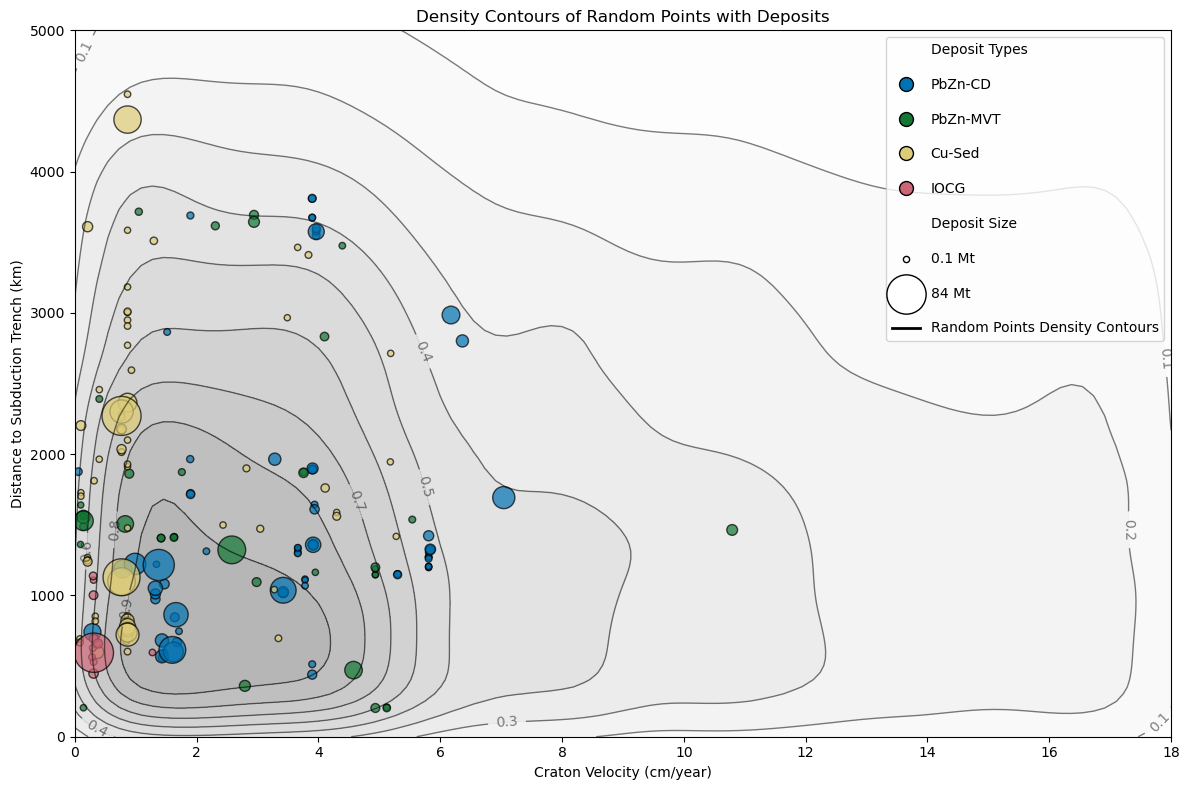

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import gaussian_kde

# Load your CSV file into a DataFrame
file_path = 'deposits_VS_random.csv'  # Update with your file path
df = pd.read_csv(file_path)

# Define columns for deposit and random data
x_deposit = 'D_cr_ve_m'
y_deposit = 'D_ds_tr'
x_random = 'R_cr_ve_m'
y_random = 'R_ds_tr'
weights_column = 'TM2'

# Select data without filtering NaN
deposit_data = df[[x_deposit, y_deposit, weights_column, 'Type']]
random_data = df[[x_random, y_random]]

# Remove negative values
deposit_data = deposit_data[(deposit_data[x_deposit] >= 0) & (deposit_data[y_deposit] >= 0)]
random_data = random_data[(random_data[x_random] >= 0) & (random_data[y_random] >= 0)]

# Extract data and weights
x_deposit_values = deposit_data[x_deposit]
y_deposit_values = deposit_data[y_deposit]
deposit_weights = deposit_data[weights_column]
deposit_types = deposit_data['Type']

x_random_values = random_data[x_random]
y_random_values = random_data[y_random]

# Define colors based on deposit type
type_colors = {
    'PbZn-CD': '#0072B2',  # Blue
    'PbZn-MVT': '#117733',  # Green
    'Cu-Sed': '#DDCC77',  # Yellow
    'IOCG': '#CC6677',  # Pink
    'Unknown': 'gray'  # For any NaN or unknown types
}

# Map TM2 to size using a continuous scale
min_size, max_size = 20, 800  # Minimum and maximum sizes for scaling
scaled_sizes = (deposit_weights - deposit_weights.min()) / (deposit_weights.max() - deposit_weights.min())
scaled_sizes = scaled_sizes * (max_size - min_size) + min_size

# Compute density contours for random points
xmin, xmax = 0, 18
ymin, ymax = 0, 5000
xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))

# Compute KDE for random points
values = np.vstack([x_random_values, y_random_values])
kde = gaussian_kde(values)
density = kde(np.vstack([xx.ravel(), yy.ravel()])).reshape(xx.shape)

# Normalize density values to range between 0 and 1
density_normalized = density / density.max()

# Create plot
plt.figure(figsize=(12, 8))

# Plot filled gray contour for random points
contour = plt.contourf(xx, yy, density_normalized, levels=10, cmap='Greys', alpha=0.3)
cset = plt.contour(xx, yy, density_normalized, levels=10, colors='black', linewidths=1, alpha=0.5)

# Ensure labels are meaningful (between 0 and 1)
plt.clabel(cset, inline=True, fontsize=10, fmt="%.1f")  # Labels with 3 decimal places

# Scatter plot for deposits with continuous scaling, colored by type
for deposit_type in deposit_types.unique():
    if pd.isna(deposit_type) or deposit_type == 'Unknown':
        continue
    type_data = deposit_data[deposit_data['Type'] == deposit_type]
    plt.scatter(type_data[x_deposit], type_data[y_deposit],
                s=scaled_sizes[type_data.index],
                color=type_colors.get(deposit_type, 'gray'),
                edgecolor='black',
                alpha=0.7, label=f'{deposit_type}', marker='o')

# Add placeholders for Deposit Types and Deposit Size
legend_elements = []
legend_elements.append(plt.Line2D([0], [0], label='Deposit Types', color='none'))
for deposit_type, color in type_colors.items():
    if deposit_type != 'Unknown':
        legend_elements.append(plt.Line2D([0], [0], marker='o', color=color, label=deposit_type, markersize=10, 
                                          markeredgecolor='black', linestyle='None'))

legend_elements.append(plt.Line2D([0], [0], label='Deposit Size', color='none'))
legend_elements.append(plt.scatter([], [], s=min_size, color='white', alpha=1, edgecolor='black', label='0.1 Mt', marker='o'))
legend_elements.append(plt.scatter([], [], s=max_size, color='white', alpha=1, edgecolor='black', label='84 Mt', marker='o'))

# Add legend entry for random point density contours
legend_elements.append(plt.Line2D([0], [0], color='black', linewidth=2, label='Random Points Density Contours'))

# Set axis limits
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])

# Labels and legend
plt.xlabel('Craton Velocity (cm/year)')
plt.ylabel('Distance to Subduction Trench (km)')
plt.legend(handles=legend_elements, loc='upper right', frameon=True, labelspacing=1.5)

plt.title('Density Contours of Random Points with Deposits')
plt.tight_layout()
plt.show()


C:\Users\Hojat\AppData\Local\Temp\ipykernel_14432\2309061600.py:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


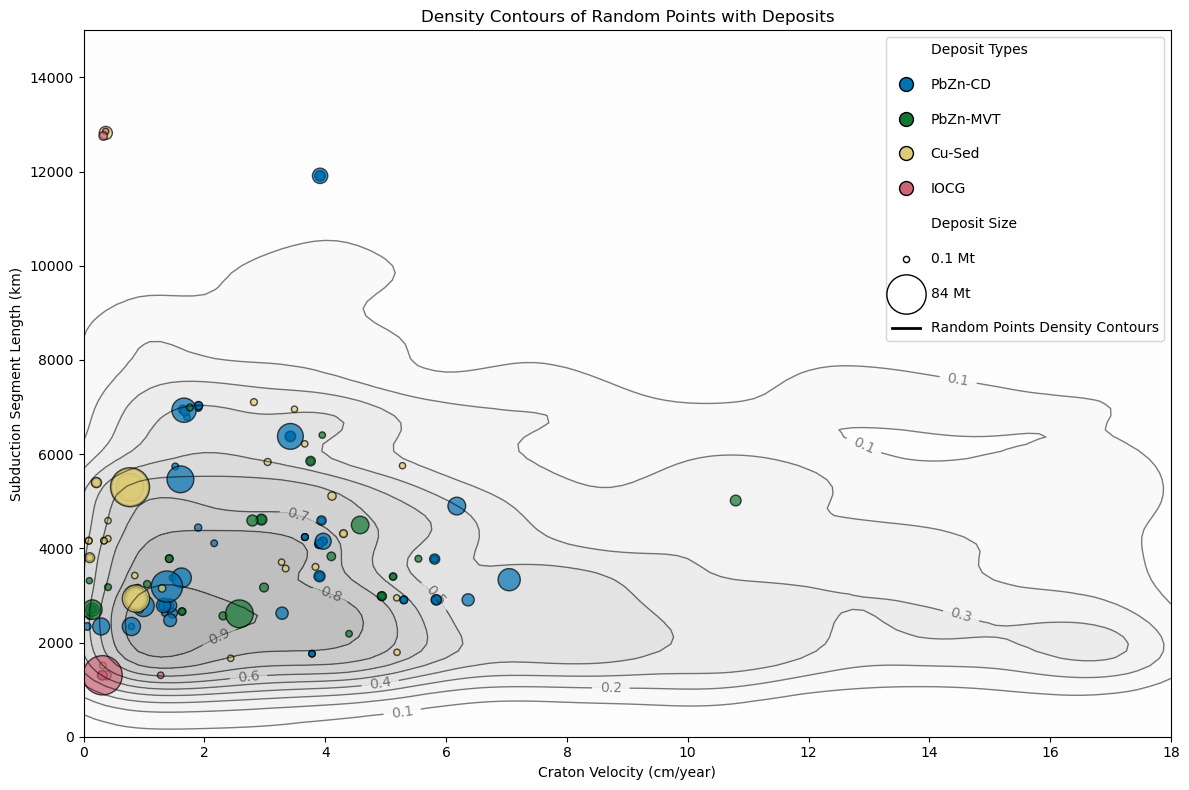

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import gaussian_kde

# Load your CSV file into a DataFrame
file_path = 'deposits_VS_random.csv'  # Update with your file path
df = pd.read_csv(file_path)

# Define columns for deposit and random data
x_deposit = 'D_cr_ve_m'
y_deposit = 'D_sub_len_m'
x_random = 'R_cr_ve_m'
y_random = 'R_sub_len_m'
weights_column = 'TM2'

# Select data without filtering NaN
deposit_data = df[[x_deposit, y_deposit, weights_column, 'Type']]
random_data = df[[x_random, y_random]]

# Remove negative values
deposit_data = deposit_data[(deposit_data[x_deposit] >= 0) & (deposit_data[y_deposit] >= 0)]
random_data = random_data[(random_data[x_random] >= 0) & (random_data[y_random] >= 0)]

# Extract data and weights
x_deposit_values = deposit_data[x_deposit]
y_deposit_values = deposit_data[y_deposit]
deposit_weights = deposit_data[weights_column]
deposit_types = deposit_data['Type']

x_random_values = random_data[x_random]
y_random_values = random_data[y_random]

# Define colors based on deposit type
type_colors = {
    'PbZn-CD': '#0072B2',  # Blue
    'PbZn-MVT': '#117733',  # Green
    'Cu-Sed': '#DDCC77',  # Yellow
    'IOCG': '#CC6677',  # Pink
    'Unknown': 'gray'  # For any NaN or unknown types
}

# Map TM2 to size using a continuous scale
min_size, max_size = 20, 800  # Minimum and maximum sizes for scaling
scaled_sizes = (deposit_weights - deposit_weights.min()) / (deposit_weights.max() - deposit_weights.min())
scaled_sizes = scaled_sizes * (max_size - min_size) + min_size

# Compute density contours for random points
xmin, xmax = 0, 18
ymin, ymax = 0, 15000
xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))

# Compute KDE for random points
values = np.vstack([x_random_values, y_random_values])
kde = gaussian_kde(values)
density = kde(np.vstack([xx.ravel(), yy.ravel()])).reshape(xx.shape)

# Normalize density values to range between 0 and 1
density_normalized = density / density.max()

# Create plot
plt.figure(figsize=(12, 8))

# Plot filled gray contour for random points
contour = plt.contourf(xx, yy, density_normalized, levels=10, cmap='Greys', alpha=0.3)
cset = plt.contour(xx, yy, density_normalized, levels=10, colors='black', linewidths=1, alpha=0.5)

# Ensure labels are meaningful (between 0 and 1)
plt.clabel(cset, inline=True, fontsize=10, fmt="%.1f")  # Labels with 3 decimal places

# Scatter plot for deposits with continuous scaling, colored by type
for deposit_type in deposit_types.unique():
    if pd.isna(deposit_type) or deposit_type == 'Unknown':
        continue
    type_data = deposit_data[deposit_data['Type'] == deposit_type]
    plt.scatter(type_data[x_deposit], type_data[y_deposit],
                s=scaled_sizes[type_data.index],
                color=type_colors.get(deposit_type, 'gray'),
                edgecolor='black',
                alpha=0.7, label=f'{deposit_type}', marker='o')

# Add placeholders for Deposit Types and Deposit Size
legend_elements = []
legend_elements.append(plt.Line2D([0], [0], label='Deposit Types', color='none'))
for deposit_type, color in type_colors.items():
    if deposit_type != 'Unknown':
        legend_elements.append(plt.Line2D([0], [0], marker='o', color=color, label=deposit_type, markersize=10, 
                                          markeredgecolor='black', linestyle='None'))

legend_elements.append(plt.Line2D([0], [0], label='Deposit Size', color='none'))
legend_elements.append(plt.scatter([], [], s=min_size, color='white', alpha=1, edgecolor='black', label='0.1 Mt', marker='o'))
legend_elements.append(plt.scatter([], [], s=max_size, color='white', alpha=1, edgecolor='black', label='84 Mt', marker='o'))

# Add legend entry for random point density contours
legend_elements.append(plt.Line2D([0], [0], color='black', linewidth=2, label='Random Points Density Contours'))

# Set axis limits
plt.xlim([xmin, xmax])
plt.ylim([ymin, ymax])

# Labels and legend
plt.xlabel('Craton Velocity (cm/year)')
plt.ylabel('Subduction Segment Length (km)')
plt.legend(handles=legend_elements, loc='upper right', frameon=True, labelspacing=1.5)

plt.title('Density Contours of Random Points with Deposits')
plt.tight_layout()
plt.show()


# box-violin

C:\Users\Hojat\AppData\Local\Temp\ipykernel_5688\332756822.py:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


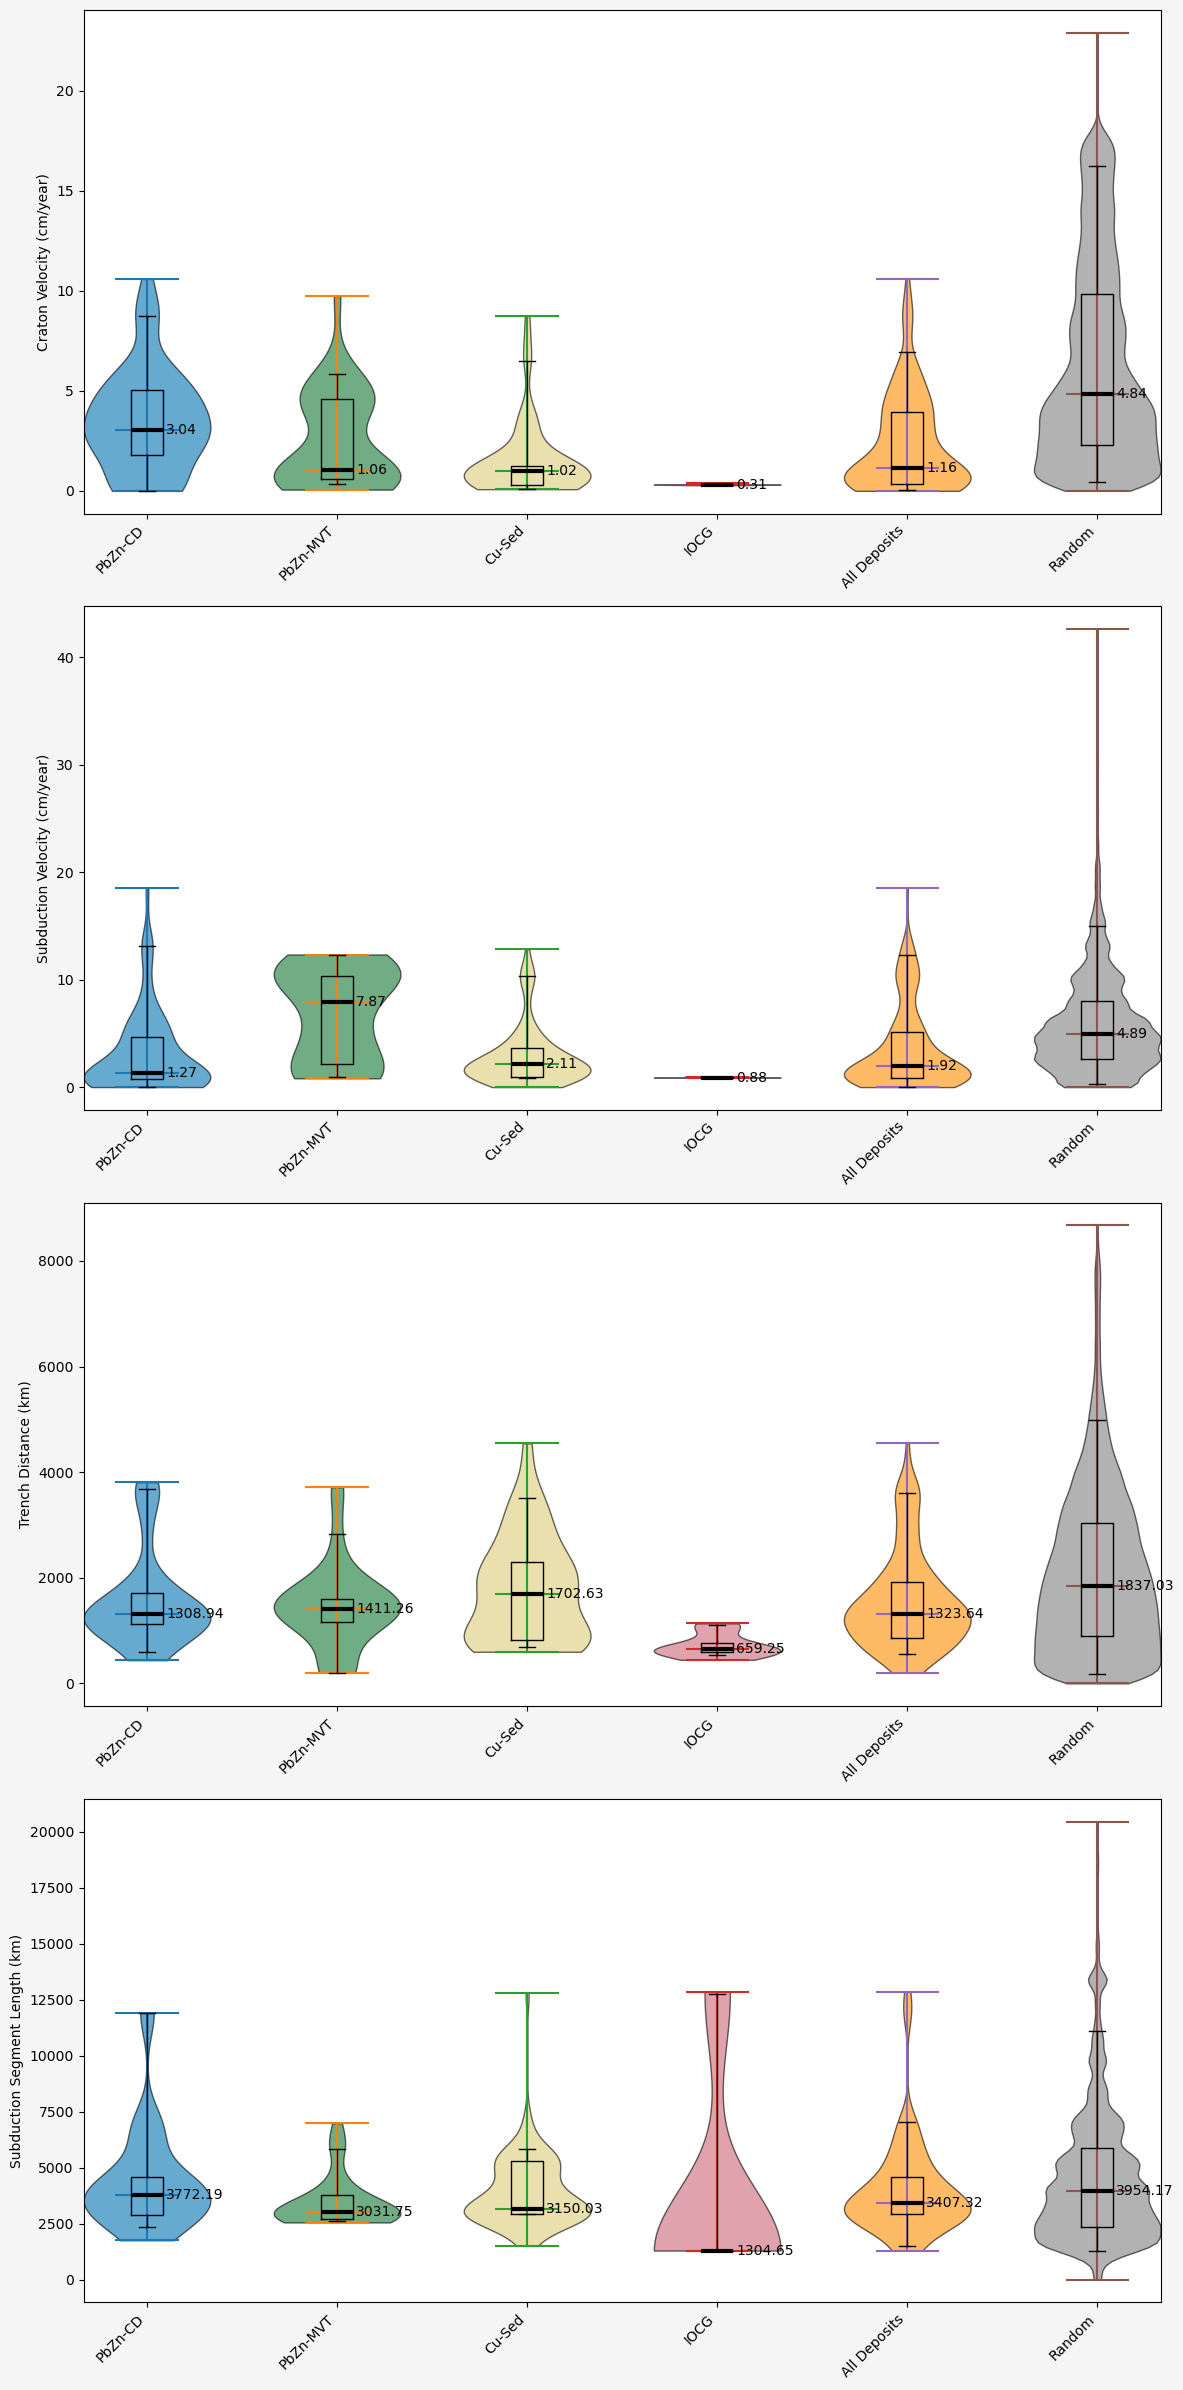

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Load your CSV file into a DataFrame
file_path = 'deposits_VS_random.csv'  # Update with your file path
df = pd.read_csv(file_path)

# Define columns for deposit and random data
features = [
    ("D_cr_ve", "R_cr_ve", "Craton Velocity (cm/year)"),
    ("D_sb_ve", "R_sb_ve", "Subduction Velocity (cm/year)"),
    ("D_ds_tr", "R_ds_tr", "Trench Distance (km)"),
    ("D_sub_len_m", "R_sub_len_m", "Subduction Segment Length (km)")
]
weights_column = 'TM2'

# Define deposit types and their colors
deposit_types = ['PbZn-CD', 'PbZn-MVT', 'Cu-Sed', 'IOCG']
type_colors = {
    'PbZn-CD': '#0072B2',  # Blue
    'PbZn-MVT': '#117733',  # Green
    'Cu-Sed': '#DDCC77',  # Yellow
    'IOCG': '#CC6677',  # Pink
    'Combined': 'darkorange',  # Orange for all deposits
    'Random': 'gray'  # Gray for random points
}

# Drop NaN values for deposits and random points
deposit_data = df[[col[0] for col in features] + [weights_column, 'Type']].dropna()
random_data = df[[col[1] for col in features]].dropna()

# Remove negative values
for col in [col[0] for col in features]:
    deposit_data = deposit_data[deposit_data[col] >= 0]
for col in [col[1] for col in features]:
    random_data = random_data[random_data[col] >= 0]

# Combine all deposit types into a single category
deposit_data_combined = deposit_data.copy()
deposit_data_combined['Type'] = 'Combined'

# Create subplots for all features with adjusted positions and median labels
num_features = len(features)
fig, axes = plt.subplots(num_features, 1, figsize=(12, 6 * num_features))
fig.set_facecolor('whitesmoke')

# Loop through each feature and plot
for i, (deposit_col, random_col, ylabel) in enumerate(features):
    ax = axes[i] if num_features > 1 else axes
    position_offset = 0
    position_step = 0.3
    positions = []
    labels = []

    for deposit_type in deposit_types:
        deposit_type_data = deposit_data[deposit_data['Type'] == deposit_type]
        plot_data_deposit = deposit_type_data[deposit_col].dropna()
        positions.append(position_offset)
        labels.append(deposit_type)
        
        # Plot violin and box plot for each deposit type
        vplot_parts = ax.violinplot([plot_data_deposit], positions=[position_offset], widths=0.2, showmedians=True)
        bp = ax.boxplot([plot_data_deposit], positions=[position_offset], widths=0.05, patch_artist=False, whis=(5, 95),
                        medianprops=dict(color='black', linewidth=3), showfliers=False)
        
        for body in vplot_parts['bodies']:
            body.set_facecolor(type_colors.get(deposit_type, 'lightblue'))
            body.set_edgecolor('black')
            body.set_alpha(0.6)
        
        deposit_median = plot_data_deposit.median()
        ax.text(position_offset + 0.03, deposit_median, f'{deposit_median:.2f}', color='black', ha='left', va='center', fontsize=10)
        position_offset += position_step

    # Plot combined deposits
    plot_data_deposit_combined = deposit_data_combined[deposit_col].dropna()
    positions.append(position_offset)
    labels.append('All Deposits')
    
    vplot_combined = ax.violinplot([plot_data_deposit_combined], positions=[position_offset], widths=0.2, showmedians=True)
    bp_combined = ax.boxplot([plot_data_deposit_combined], positions=[position_offset], widths=0.05, patch_artist=False, whis=(5, 95),
                              medianprops=dict(color='black', linewidth=3), showfliers=False)
    
    for body in vplot_combined['bodies']:
        body.set_facecolor(type_colors['Combined'])
        body.set_edgecolor('black')
        body.set_alpha(0.6)
    
    deposit_median = plot_data_deposit_combined.median()
    ax.text(position_offset + 0.03, deposit_median, f'{deposit_median:.2f}', color='black', ha='left', va='center', fontsize=10)
    position_offset += position_step
    
    # Plot random points
    plot_data_random = random_data[random_col].dropna()
    positions.append(position_offset)
    labels.append('Random')
    
    vplot_random = ax.violinplot([plot_data_random], positions=[position_offset], widths=0.2, showmedians=True)
    bp_random = ax.boxplot([plot_data_random], positions=[position_offset], widths=0.05, patch_artist=False, whis=(5, 95),
                            medianprops=dict(color='black', linewidth=3), showfliers=False)
    
    for body in vplot_random['bodies']:
        body.set_facecolor(type_colors['Random'])
        body.set_edgecolor('black')
        body.set_alpha(0.6)
    
    random_median = plot_data_random.median()
    ax.text(position_offset + 0.03, random_median, f'{random_median:.2f}', color='black', ha='left', va='center', fontsize=10)
    
    # Format axes
    ax.set_xticks(positions)
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.set_xlim(-0.1, position_offset + 0.1)
    ax.set_ylabel(ylabel)

plt.tight_layout()
plt.show()
